In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [81]:
train_data = pd.read_excel("training.xlsx")
print("Info:")
print(train_data.info());

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 19 columns):
SUBDIVISION    1797 non-null object
YEAR           1797 non-null int64
JAN            1796 non-null float64
FEB            1795 non-null float64
MAR            1796 non-null float64
APR            1797 non-null float64
MAY            1797 non-null float64
JUN            1797 non-null float64
JUL            1797 non-null float64
AUG            1797 non-null float64
SEP            1797 non-null float64
OCT            1796 non-null float64
NOV            1796 non-null float64
DEC            1796 non-null float64
ANNUAL         1793 non-null float64
Jan-Feb        1795 non-null float64
Mar-May        1796 non-null float64
Jun-Sep        1797 non-null float64
Oct-Dec        1795 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 266.9+ KB
None


In [82]:
train_data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            2
MAR            1
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            1
NOV            1
DEC            1
ANNUAL         4
Jan-Feb        2
Mar-May        1
Jun-Sep        0
Oct-Dec        2
dtype: int64

In [83]:
train_data = train_data.fillna(train_data.mean())
print("Total no.of null values in dataset:")
train_data.isnull().sum().sum()

Total no.of null values in dataset:


0

In [84]:
train_data

SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1951  82.7   7.2   0.0   45.4  259.0  619.9   
1     ANDAMAN & NICOBAR ISLANDS  1952   0.0   0.8  69.7   39.4  452.9  657.7   
2     ANDAMAN & NICOBAR ISLANDS  1953  56.0  65.3  20.1  159.4  241.1  549.9   
3     ANDAMAN & NICOBAR ISLANDS  1954  83.8   2.1  34.3   58.0  394.7  539.4   
4     ANDAMAN & NICOBAR ISLANDS  1955  57.3  28.2   9.9   68.8  663.6  651.1   
...                         ...   ...   ...   ...   ...    ...    ...    ...   
1792                LAKSHADWEEP  1996  44.7   1.1   1.6   17.4   50.0  427.1   
1793                LAKSHADWEEP  1997   2.2   0.1   4.9   33.8   62.3  307.0   
1794                LAKSHADWEEP  1998  52.0   0.0   1.8   40.3   68.2  382.0   
1795                LAKSHADWEEP  1999  47.8   2.5  18.3   20.6  416.7  279.6   
1796                LAKSHADWEEP  2000  83.3  18.9   3.4   47.9  204.6  225.4   

        JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0     665.3  101.3  360.9  489.0  209.6  434.8  3275.1     89.9    304.4   
1     385.5  541.3  240.3  315.6  287.5   89.2  3079.9      0.8    562.0   
2     444.4  262.8  370.1  243.6  246.0   63.3  2721.9    121.3    420.5   
3     510.8  605.4  763.8  247.2   84.8  124.7  3449.0     85.9    487.0   
4     298.4  356.9  341.8  466.5  362.9   44.2  3349.6     85.5    742.2   
...     ...    ...    ...    ...    ...    ...     ...      ...      ...   
1792  335.3  197.3  230.4  109.0   60.5  131.6  1606.0     45.8     69.0   
1793  459.6  216.8  144.0  213.5  200.8  119.7  1764.7      2.3    101.0   
1794  388.8  196.7  274.7  184.8  144.1  253.5  1986.9     52.0    110.3   
1795  459.4  133.8   73.4  305.0   51.2   49.0  1857.3     50.3    455.6   
1796   95.5  319.9  164.5  141.4   56.3   11.0  1372.1    102.2    255.9   

      Jun-Sep  Oct-Dec  
0      1747.4   1133.4  
1      1824.8    692.3  
2      1627.1    552.9  
3      2419.4    456.7  
4      1648.3    873.6  
...       ...      ...  
1792   1190.1    301.1  
1793   1127.4    534.0  
1794   1242.2    582.4  
1795    946.2    405.2  
1796    805.3    208.7  

[1797 rows x 19 columns]

In [85]:
temp = train_data.groupby("YEAR").sum()
train_data.groupby("YEAR").sum()

JAN          FEB          MAR     APR     MAY      JUN      JUL  \
YEAR                                                                            
1951   568.600000   374.200000  1493.200000  2284.0  2725.5   8484.1  11910.9   
1952   334.300000   664.000000  1338.300000  1408.5  3449.2   8353.7  11569.3   
1953  1034.700000   464.900000   938.100000  1599.2  2209.8   7949.2  14823.7   
1954  1156.000000  1172.100000   661.000000  1039.3  2631.6   7930.7  13295.9   
1955   810.800000   217.700000   845.200000  1378.5  4040.7   8689.9  10264.0   
1956   601.300000   414.000000  1086.700000  1382.6  4534.9   9761.5  13871.2   
1957  1376.289254   482.432646   966.615367  1331.3  3278.0   8066.5  13230.2   
1958   494.900000   578.300000   610.800000  1412.5  3805.1   7195.5  13174.5   
1959  1105.600000   838.500000   802.900000  1203.6  3702.9   8749.3  16196.5   
1960   571.300000   197.200000  1163.900000   954.1  3871.6   7796.1  13546.2   
1961   995.600000  1421.800000  1006.700000  1162.2  5100.5   9391.3  14942.1   
1962   654.000000   749.700000   568.100000  1684.9  3977.8   6450.2  12491.2   
1963   429.800000   454.100000  1262.100000  1833.5  2883.1   7894.9  11589.1   
1964   562.600000   491.900000   663.800000  1546.3  2599.3   8351.9  14643.4   
1965   347.200000   958.900000   965.600000  1556.0  2451.1   6451.6  11782.2   
1966   526.800000   705.500000   636.600000  1143.1  2741.2   7746.1  11489.5   
1967   529.900000   410.700000  2071.100000  1121.6  2480.3   7145.6  13826.0   
1968   971.200000   698.000000  1025.800000  1379.8  2129.4   7960.9  14211.7   
1969   515.400000   422.000000   680.400000  1513.1  2997.4   6680.5  13338.1   
1970   879.300000   981.600000   775.900000  1266.0  3476.5   9707.2  11646.1   
1971   621.200000   794.600000   448.200000  2085.7  3950.7  10710.8  11395.0   
1972   306.300000   890.800000   609.100000  1542.9  2901.8   6405.9   9583.7   
1973   628.400000   735.100000   640.000000  1109.1  2839.4   7689.5  11130.8   
1974   480.600000   390.400000   760.000000  1676.7  3187.1   5921.9  13051.5   
1975   794.800000   669.800000   857.000000  1146.2  2653.1   9165.1  12716.9   
1976   324.700000   773.700000   826.200000  1602.3  2452.0   7375.7  12865.4   
1977   665.100000   431.300000   562.000000  2619.4  3937.9   8746.5  13968.5   
1978   480.700000   923.200000  1438.000000  1394.7  3493.2  10498.9  12441.4   
1979   744.100000  1142.000000   880.500000   865.5  2023.0   6859.9  10901.8   
1980   409.600000   666.700000  1128.800000  1482.4  3035.9  10450.5  12784.3   
1981   930.800000   695.500000  1550.300000  1550.7  3168.9   8279.8  12878.8   
1982   756.700000   766.300000  1569.500000  1951.3  2593.8   7053.1  10650.5   
1983   646.900000   796.800000  1311.700000  2017.1  3073.1   7229.2  12212.6   
1984   762.300000  1405.200000   885.700000  1844.8  2734.9   9478.0  12576.7   
1985   734.900000   352.100000   790.400000  1467.5  2991.0   8511.4  11690.7   
1986   476.900000  1095.200000   836.500000  1741.7  2280.2   8594.2  10051.6   
1987   505.300000   675.100000   897.800000  1586.7  2623.2   6811.2   9117.4   
1988   250.500000   920.600000  1715.500000  1721.3  3334.6   7374.5  16043.0   
1989   608.800000   484.800000   922.500000  1342.1  2708.0   8969.0  12667.6   
1990   420.900000  1434.700000  1708.500000  1634.8  5458.1   8802.2  12201.7   
1991   446.200000   759.600000   916.000000  1826.2  3020.5   9453.3  12661.6   
1992   657.600000   660.700000   763.600000   856.0  2622.4   7237.3  11656.1   
1993   576.400000   809.200000  1399.400000  1101.7  3040.3   7700.2  13649.2   
1994   765.900000   987.300000  1052.000000  1949.8  2521.0   9480.6  14697.2   
1995  1194.500000   930.000000   919.200000  1472.8  3713.1   7086.8  13942.9   
1996   763.600000   772.600000   988.400000  1276.9  2533.6   8518.6  11849.0   
1997   455.700000   347.000000  1005.500000  1625.4  2164.4   8149.5  13252.7   
1998   557.400000   978.400000  1522.600000  

Text(0, 0.5, 'Annual rainfall of India(cm)')

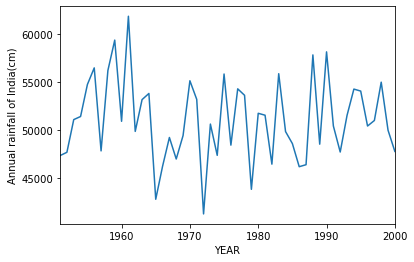

In [86]:
temp['ANNUAL'].plot()
plt.ylabel("Annual rainfall of India(cm)")

Text(0, 0.5, 'Monthly raifall of india(cm)')

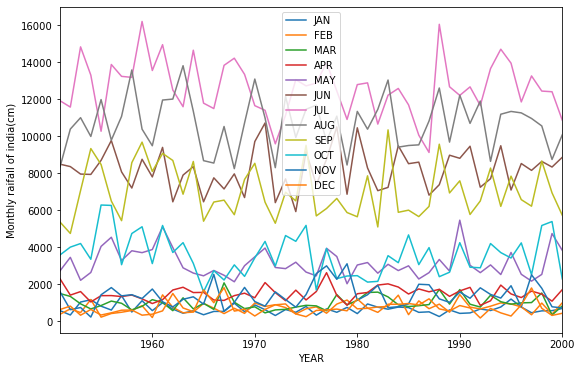

In [87]:
temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].plot(figsize=(9,6))
plt.ylabel("Monthly raifall of india(cm)")

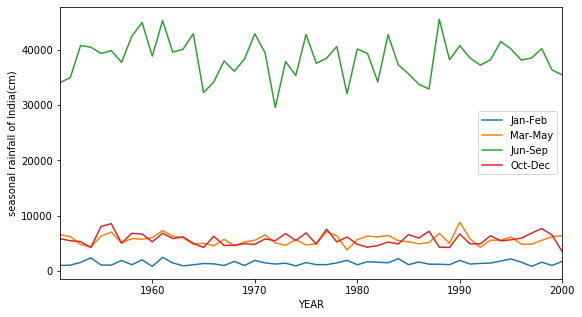

In [88]:
temp[['Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].plot(figsize=(9,5))
plt.ylabel("seasonal rainfall of India(cm)")
plt.show()

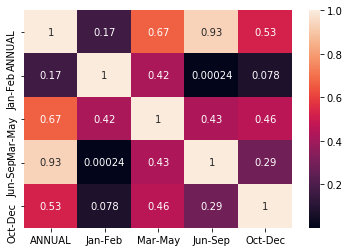

In [89]:
sns.heatmap(train_data[['ANNUAL','Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].corr(),annot=True)
plt.show()

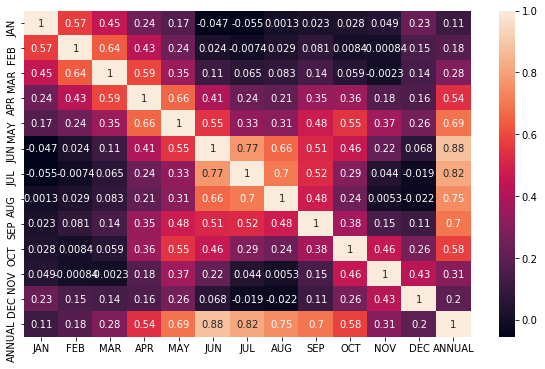

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [91]:
def plot_graphs(groundtruth,prediction,title,months):        
    N = months
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27      # the width of the bars

    
    fig = plt.figure(figsize=(13,4))
    #plt.figure(figsize=(7,10))
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("standardized rainfall")
    #ax.set_xticks(ind+width)
    #ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Actual_rainfall', 'Predicted_rainfall') )
    
    plt.show()
    
'''
#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)
'''


"\n#     autolabel(rects1)\n    for rect in rects1:\n        h = rect.get_height()\n        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),\n                ha='center', va='bottom')\n    for rect in rects2:\n        h = rect.get_height()\n        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),\n                ha='center', va='bottom')\n#     autolabel(rects2)\n"

In [92]:
train_data_arr = np.asarray(train_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = train_data_arr.reshape(train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [93]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 3, 64)             192       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 3, 128)            16512     
_________________________________________________________________
flatten_5 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)              

In [94]:
test_data = pd.read_excel("test.xlsx")
print("Info:")
print(test_data.info());

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
SUBDIVISION    540 non-null object
YEAR           540 non-null int64
JAN            539 non-null float64
FEB            540 non-null float64
MAR            540 non-null float64
APR            540 non-null float64
MAY            540 non-null float64
JUN            540 non-null float64
JUL            539 non-null float64
AUG            540 non-null float64
SEP            540 non-null float64
OCT            540 non-null float64
NOV            539 non-null float64
DEC            539 non-null float64
ANNUAL         538 non-null float64
Jan-Feb        539 non-null float64
Mar-May        540 non-null float64
Jun-Sep        539 non-null float64
Oct-Dec        539 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 80.3+ KB
None


In [95]:
test_data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            1
AUG            0
SEP            0
OCT            0
NOV            1
DEC            1
ANNUAL         2
Jan-Feb        1
Mar-May        0
Jun-Sep        1
Oct-Dec        1
dtype: int64

In [96]:
test_data = test_data.fillna(test_data.mean())
print("Total no.of null values in test dataset:")
test_data.isnull().sum().sum()

Total no.of null values in test dataset:


0

In [97]:
test_data_arr = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = test_data_arr.reshape(test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)
        

In [98]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 13423.3721 - mae: 69.9037 - val_loss: 20750.7637 - val_mae: 81.0149
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 12378.8008 - mae: 68.5341 - val_loss: 20975.9766 - val_mae: 77.7221
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 12336.6074 - mae: 67.9818 - val_loss: 20418.2324 - val_mae: 79.2190
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 12159.4531 - mae: 67.8308 - val_loss: 21470.6445 - val_mae: 76.7404
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 12191.1572 - mae: 67.6796 - val_loss: 20804.9160 - val_mae: 82.2885
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 12152.0576 - mae: 67.6925 - val_loss: 20753.1426 - val_mae: 79.9050
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 12166.2207 - mae: 67.6586 - val_loss: 20998.4180 - val_mae: 78.8543
Epoch 

In [99]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'TELANGANA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

In [100]:
X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-3):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+3]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,3)
        y_year_2001_2015 = data_2001_2015[i+3]
    else:
        temp = data_2001_2015[i:i+3].reshape(1,3)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+3]), axis=0)

In [101]:
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

MEAN 2001_2015
79.31694915254236 86.13982
Standard deviation 2001_2015
99.63838995223804 78.298


In [102]:
y_year_pred_2001_2015.shape

(177, 1)

In [103]:
y_year_2001_2015 = y_year_2001_2015.reshape(177,)

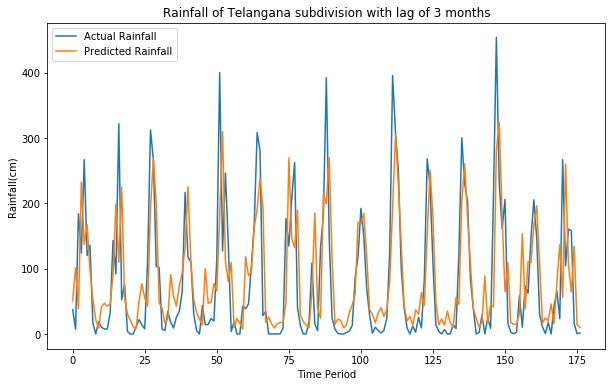

In [104]:
'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Telangana subdivision with lag of 3 months")
plt.legend()
plt.show()

In [105]:
def NSE(s, o):
    """
        Nash Sutcliffe efficiency coefficient
        input:
        s: simulated
        o: observed
        output:
        ns: Nash Sutcliffe efficient coefficient
        """
    return  1-(np.sum((s-o)**2)/np.sum((o-np.mean(o))**2))

In [106]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for telangana sub-divison :")
print(RMSE)
print("NSE for telangana sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for telangana sub-division :")
print(R2)

Co-efficient of corelation :
0.6841133521275434
RMSE(mm) for telangana sub-divison :
73.6935179890947
NSE for telangana sub-division :
0.45297751708150524
R2 score for telangana sub-division :
0.45297751708150524


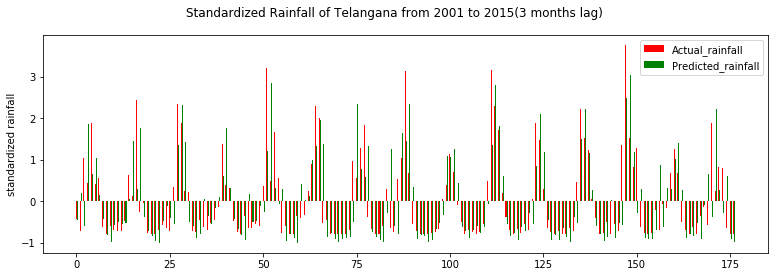

In [107]:
y_year_2001_2015 = y_year_2001_2015.reshape(177,1)
y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data_observed = scaler.fit_transform(y_year_2001_2015)
scaled_data_predicted = scaler.fit_transform(y_year_pred_2001_2015)

scaled_data_observed = scaled_data_observed.reshape(177,)
scaled_data_predicted = scaled_data_predicted.reshape(177,)
plot_graphs(scaled_data_observed,scaled_data_predicted,"Standardized Rainfall of Telangana from 2001 to 2015(3 months lag)",177)

MEAN 2001_2015
123.31581920903956 110.21897
Standard deviation 2001_2015
149.3448940435235 96.30672


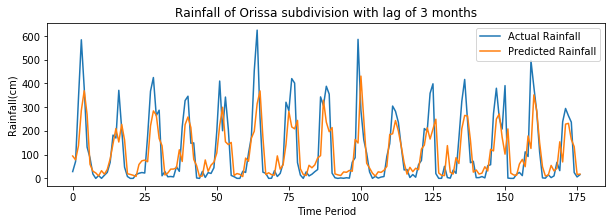

In [108]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'ORISSA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-3):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+3]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,3)
        y_year_2001_2015 = data_2001_2015[i+3]
    else:
        temp = data_2001_2015[i:i+3].reshape(1,3)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+3]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(177,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,3))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Orissa subdivision with lag of 3 months")
plt.legend()
plt.show()

In [109]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for orissa sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for orissa sub-division :")
print(R2)

Co-efficient of corelation :
0.7343710556036674
RMSE(mm) for orissa sub-divison :
103.08061601951701
NSE for orissa sub-division :
0.5235983550578173
R2 score for orissa sub-division :
0.5235983550578173


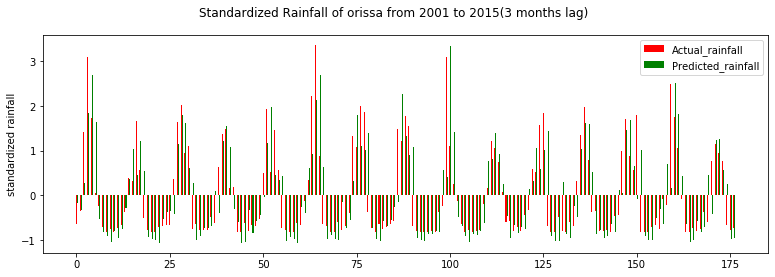

In [110]:
y_year_2001_2015 = y_year_2001_2015.reshape(177,1)
y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data_observed = scaler.fit_transform(y_year_2001_2015)
scaled_data_predicted = scaler.fit_transform(y_year_pred_2001_2015)

scaled_data_observed = scaled_data_observed.reshape(177,)
scaled_data_predicted = scaled_data_predicted.reshape(177,)
plot_graphs(scaled_data_observed,scaled_data_predicted,"Standardized Rainfall of orissa from 2001 to 2015(3 months lag)",177)

MEAN 2001_2015
98.545197740113 97.36143
Standard deviation 2001_2015
120.20377374567327 83.43109


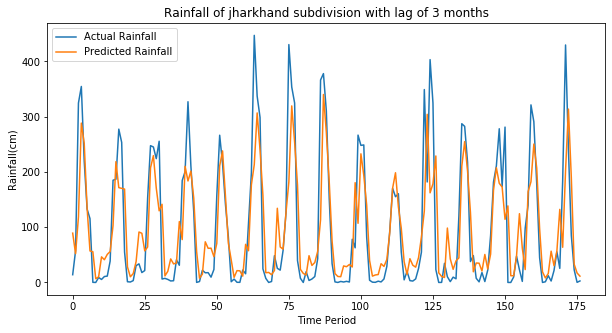

In [111]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'JHARKHAND'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-3):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+3]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,3)
        y_year_2001_2015 = data_2001_2015[i+3]
    else:
        temp = data_2001_2015[i:i+3].reshape(1,3)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+3]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(177,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,5))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of jharkhand subdivision with lag of 3 months")
plt.legend()
plt.show()

In [112]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for jharkhand sub-divison :")
print(RMSE)
print("NSE for jharkhand sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for jharkhand sub-division :")
print(R2)

Co-efficient of corelation :
0.7934074982450552
RMSE(mm) for jharkhand sub-divison :
74.14413827382837
NSE for jharkhand sub-division :
0.619532609840834
R2 score for jharkhand sub-division :
0.619532609840834


In [113]:
train_data_arr = np.asarray(train_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = train_data_arr.reshape(train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

In [114]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               98432     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)              

In [115]:
test_data_arr = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = test_data_arr.reshape(test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

In [116]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
270/270 [==============================] - 2s 6ms/step - loss: 13621.8262 - mae: 69.1943 - val_loss: 20505.6621 - val_mae: 78.7382
Epoch 2/10
270/270 [==============================] - 1s 5ms/step - loss: 11949.3740 - mae: 66.3168 - val_loss: 20427.3145 - val_mae: 78.1079
Epoch 3/10
270/270 [==============================] - 1s 5ms/step - loss: 11688.1543 - mae: 65.6404 - val_loss: 21000.8047 - val_mae: 79.9365
Epoch 4/10
270/270 [==============================] - 1s 5ms/step - loss: 11563.6279 - mae: 64.9327 - val_loss: 20979.5234 - val_mae: 84.4155
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 11408.6064 - mae: 64.6322 - val_loss: 20500.2930 - val_mae: 81.1162
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 11266.3682 - mae: 64.0673 - val_loss: 20679.5566 - val_mae: 77.4391
Epoch 7/10
270/270 [==============================] - 1s 5ms/step - loss: 11245.9307 - mae: 64.0306 - val_loss: 21264.4590 - val_mae: 80.6171
Epoch 

In [117]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'TELANGANA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-6):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+6]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,6)
        y_year_2001_2015 = data_2001_2015[i+6]
    else:
        temp = data_2001_2015[i:i+6].reshape(1,6)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+6]), axis=0)

In [118]:
y_year_2001_2015 = y_year_2001_2015.reshape(174,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

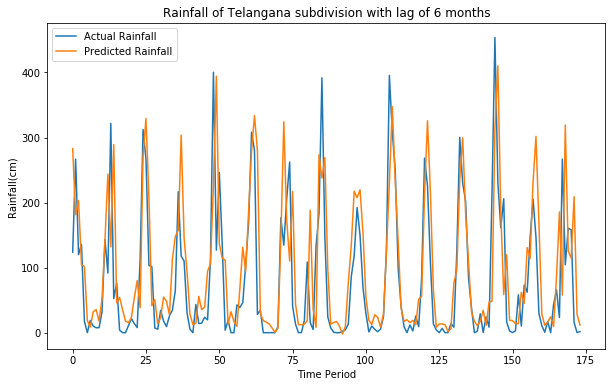

In [119]:
plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Telangana subdivision with lag of 6 months")
plt.legend()
plt.show()

In [120]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(174,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for telangana sub-divison :")
print(RMSE)
print("NSE for telangana sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for telangana sub-division :")
print(R2)

Co-efficient of corelation :
0.7022129790666619
RMSE(mm) for telangana sub-divison :
80.21883155086003
NSE for telangana sub-division :
0.3562574770724132
R2 score for telangana sub-division :
0.3562574770724132


MEAN 2001_2015
122.93735632183908 129.24034
Standard deviation 2001_2015
149.5356549798487 126.56222


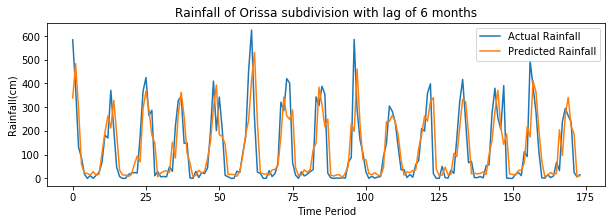

In [121]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'ORISSA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-6):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+6]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,6)
        y_year_2001_2015 = data_2001_2015[i+6]
    else:
        temp = data_2001_2015[i:i+6].reshape(1,6)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+6]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(174,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,3))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Orissa subdivision with lag of 6 months")
plt.legend()
plt.show()

In [122]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(174,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for orissa sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for orissa sub-division :")
print(R2)

Co-efficient of corelation :
0.7666694391625559
RMSE(mm) for orissa sub-divison :
96.95014787856324
NSE for orissa sub-division :
0.5796534985992032
R2 score for orissa sub-division :
0.5796534985992032


MEAN 2001_2015
97.96781609195405 112.10444
Standard deviation 2001_2015
119.80393081096831 109.78378


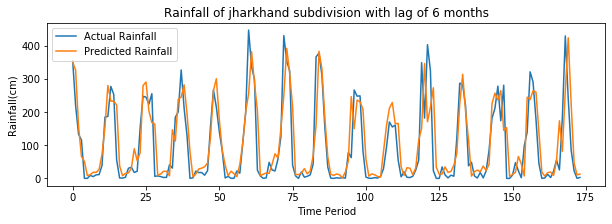

In [123]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'JHARKHAND'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-6):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+6]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,6)
        y_year_2001_2015 = data_2001_2015[i+6]
    else:
        temp = data_2001_2015[i:i+6].reshape(1,6)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+6]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(174,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,3))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of jharkhand subdivision with lag of 6 months")
plt.legend()
plt.show()

In [124]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(174,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for jharkhand sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for jharkhand sub-division :")
print(R2)

Co-efficient of corelation :
0.8165970234201995
RMSE(mm) for jharkhand sub-divison :
71.58681937669863
NSE for orissa sub-division :
0.6429541424632561
R2 score for jharkhand sub-division :
0.6429541424632561


In [125]:
train_data_arr = np.asarray(train_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = train_data_arr.reshape(train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-9):
    if (i==0):
        X_train = train_array[i:i+9]
        X_train = X_train.reshape(1,9)
        y_train = train_array[i+9]
    else :
        temp = train_array[i:i+9].reshape(1,9)
        X_train = np.concatenate((X_train, temp), axis=0)
        y_train = np.concatenate((y_train, train_array[i+9]), axis=0)

In [126]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(9,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 9, 64)             192       
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 9, 128)            16512     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               147584    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)              

In [127]:
test_data_arr = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = test_data_arr.reshape(test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-9):
    if (i==0):
        X_test = test_array[i:i+9]
        X_test = X_test.reshape(1,9)
        y_test = test_array[i+9]
    else :
        temp = test_array[i:i+9].reshape(1,9)
        X_test = np.concatenate((X_test, temp), axis=0)
        y_test = np.concatenate((y_test, test_array[i+9]), axis=0)

In [128]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
270/270 [==============================] - 2s 6ms/step - loss: 12091.9219 - mae: 65.9717 - val_loss: 19461.0898 - val_mae: 79.4202
Epoch 2/10
270/270 [==============================] - 2s 6ms/step - loss: 10454.0186 - mae: 61.6243 - val_loss: 19525.2930 - val_mae: 78.8878
Epoch 3/10
270/270 [==============================] - 2s 6ms/step - loss: 10080.2861 - mae: 60.0808 - val_loss: 19427.9062 - val_mae: 79.8510
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 9883.3779 - mae: 59.5378 - val_loss: 19457.1602 - val_mae: 80.8151
Epoch 5/10
270/270 [==============================] - 2s 7ms/step - loss: 9707.7266 - mae: 58.9850 - val_loss: 19549.2148 - val_mae: 76.6798
Epoch 6/10
270/270 [==============================] - 2s 7ms/step - loss: 9580.5703 - mae: 58.5423 - val_loss: 20007.8926 - val_mae: 78.8074
Epoch 7/10
270/270 [==============================] - 2s 6ms/step - loss: 9438.3320 - mae: 58.0783 - val_loss: 19622.7090 - val_mae: 78.2979
Epoch 8/10

In [129]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'TELANGANA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-9):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+9]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,9)
        y_year_2001_2015 = data_2001_2015[i+9]
    else:
        temp = data_2001_2015[i:i+9].reshape(1,9)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+9]), axis=0)

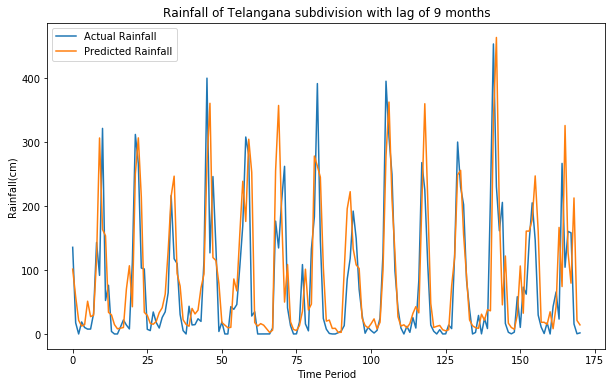

In [130]:
y_year_2001_2015 = y_year_2001_2015.reshape(171,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Telangana subdivision with lag of 9 months")
plt.legend()
plt.show()

In [131]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(171,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for telangana sub-divison :")
print(RMSE)
print("NSE for telangana sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for telangana sub-division :")
print(R2)

Co-efficient of corelation :
0.7295442569644988
RMSE(mm) for telangana sub-divison :
74.94775872341808
NSE for telangana sub-division :
0.43503908329622243
R2 score for telangana sub-division :
0.43503908329622243


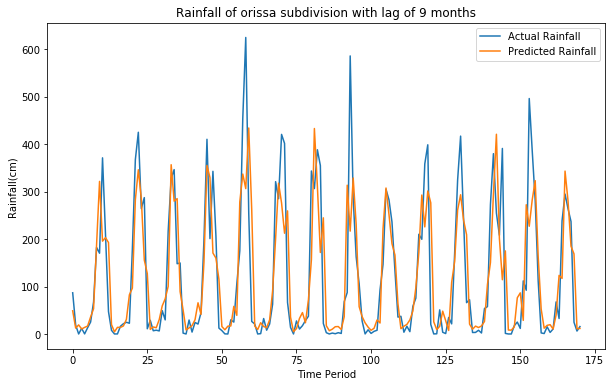

Co-efficient of corelation :
0.7754251880090024
RMSE(mm) for orissa sub-divison :
91.89932299015419
NSE for orissa sub-division :
0.5997629658858612
R2 score for orissa sub-division :
0.5997629658858612


In [132]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'ORISSA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-9):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+9]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,9)
        y_year_2001_2015 = data_2001_2015[i+9]
    else:
        temp = data_2001_2015[i:i+9].reshape(1,9)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+9]), axis=0)

y_year_2001_2015 = y_year_2001_2015.reshape(171,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of orissa subdivision with lag of 9 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(171,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for orissa sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for orissa sub-division :")
print(R2)

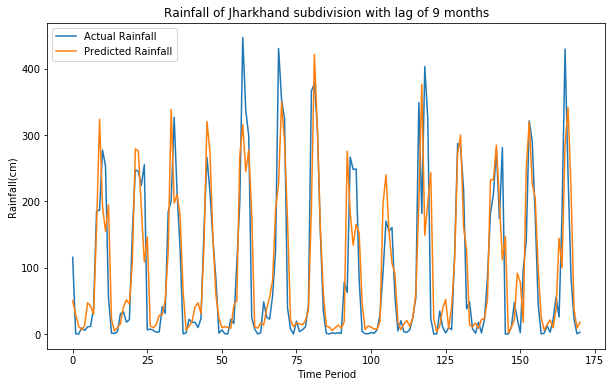

Co-efficient of corelation :
0.8193991953344643
RMSE(mm) for jharkhand sub-divison :
68.86388369222071
NSE for jharkhand sub-division :
0.6641592064170526
R2 score for jharkhand sub-division :
0.6641592064170526


In [133]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'JHARKHAND'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-9):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+9]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,9)
        y_year_2001_2015 = data_2001_2015[i+9]
    else:
        temp = data_2001_2015[i:i+9].reshape(1,9)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+9]), axis=0)

y_year_2001_2015 = y_year_2001_2015.reshape(171,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Jharkhand subdivision with lag of 9 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(171,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for jharkhand sub-divison :")
print(RMSE)
print("NSE for jharkhand sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for jharkhand sub-division :")
print(R2)

In [134]:
Index_data = pd.read_excel("Index_Data.xlsx")
print("Info:")
print(Index_data.info());

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 13 columns):
year    115 non-null int64
jan     115 non-null float64
feb     115 non-null float64
mar     115 non-null float64
apr     115 non-null float64
may     115 non-null float64
jun     115 non-null float64
jul     115 non-null float64
aug     115 non-null float64
sep     115 non-null float64
oct     115 non-null float64
nov     115 non-null float64
dec     115 non-null float64
dtypes: float64(12), int64(1)
memory usage: 11.8 KB
None


In [135]:
Index_data.isnull().sum()

year    0
jan     0
feb     0
mar     0
apr     0
may     0
jun     0
jul     0
aug     0
sep     0
oct     0
nov     0
dec     0
dtype: int64

In [136]:
Index_data

year       jan       feb       mar       apr       may       jun  \
0    1901  0.224251  0.533079  0.421868  0.442724  0.048646  0.246037   
1    1902  0.004004  0.337596  0.294217  0.873460  1.051184  1.273082   
2    1903  1.038945  0.798987  0.897991  0.834082  0.276115 -0.185744   
3    1904 -0.838245 -0.908227 -1.127652 -1.066403  0.049421  0.756841   
4    1905  0.860941  0.362566  0.871324  0.438554  1.733820  1.337262   
..    ...       ...       ...       ...       ...       ...       ...   
110  2011 -1.700000 -1.260000 -0.980000 -0.740000 -0.530000 -0.250000   
111  2012 -0.930000 -0.610000 -0.480000 -0.290000 -0.180000  0.140000   
112  2013 -0.420000 -0.400000 -0.140000 -0.080000 -0.280000 -0.330000   
113  2014 -0.420000 -0.450000 -0.070000  0.280000  0.450000  0.480000   
114  2015  0.590000  0.570000  0.480000  0.900000  1.040000  1.280000   

          jul       aug       sep       oct       nov       dec  
0   -0.221485 -0.003957 -0.342657 -0.320583  0.169946 -0.076165  
1    1.817601  1.266845  1.399793  1.409336  1.068138  1.160194  
2   -0.321035 -0.853961 -0.968593 -1.077422 -1.031329 -0.933840  
3    1.270811  1.016514  0.855331  0.733534  0.448047  0.557639  
4    2.012663  1.412831  1.116666  0.939114  0.582987  0.561846  
..        ...       ...       ...       ...       ...       ...  
110 -0.230000 -0.660000 -0.760000 -0.930000 -1.090000 -1.050000  
111  0.440000  0.660000  0.440000  0.230000  0.330000 -0.130000  
112 -0.280000 -0.290000 -0.090000 -0.240000 -0.020000 -0.090000  
113  0.130000  0.140000  0.370000  0.480000  0.890000  0.770000  
114  1.560000  1.870000  2.010000  2.210000  2.570000  2.560000  

[115 rows x 13 columns]

In [137]:
Emi_train = pd.read_excel("Emi_train.xlsx")
Emi_train

year       jan       feb       mar       apr       may       jun  \
0   1951 -0.966038 -0.864827 -0.206524  0.223148  1.150881 -0.228646   
1   1952  0.467706  0.592779  0.338709  1.106464  0.283226 -0.816496   
2   1953 -0.289339  0.342815 -0.418728 -0.013967  0.234931  0.534113   
3   1954  0.264928  0.117463 -0.136137  0.100605  0.246364  0.196379   
4   1955 -0.906236 -1.489351 -0.746012 -0.787092  0.073224 -1.310105   
5   1956 -0.460833 -0.605091 -1.352085 -1.110724 -2.083394 -1.453169   
6   1957  0.122933  0.490910 -0.127730  0.104495  0.857539  0.084672   
7   1958  0.826685  0.750464  0.962747  0.648005  1.837738  1.795142   
8   1959  0.980148  0.843694  0.996049  1.273134  1.579811  1.370131   
9   1960 -0.124167 -0.353224  0.304496  0.249410  0.753635  0.320390   
10  1961  0.531972 -1.093746 -0.205428 -1.140400 -0.633404  0.676422   
11  1962 -0.662027 -0.136945  0.282975  0.461406 -0.119403  0.472154   
12  1963  0.039011  0.043430  0.242327  0.361181  0.446078  0.758520   
13  1964  0.975855  1.131734  0.514203  1.196195  0.396007 -0.210371   
14  1965  0.404296  0.404846 -0.323518 -0.261904 -0.080460  0.415125   
15  1966  1.373860  0.961325  2.663900  1.849555  1.718180  2.253786   
16  1967  0.143187  0.168384  0.739214  1.240537  1.045940  1.248771   
17  1968  0.408963  1.123861  0.087454  0.470273  0.099863 -0.379133   
18  1969  2.467773  2.576894  1.517653  1.060675  0.844357  0.698201   
19  1970 -0.277047  0.005356 -0.509694 -0.007502 -0.055287 -0.111001   
20  1971 -1.178897 -1.290909 -1.876342 -1.222575 -1.733251 -0.614148   
21  1972 -0.343208 -0.643838  0.065063  0.499899  1.040096  0.504364   
22  1973  0.497097  0.510577  0.968829  0.145266 -0.520071 -0.805527   
23  1974 -1.434437 -1.591518 -0.415638 -0.336026 -1.096164 -0.036603   
24  1975 -0.320149  0.026386 -0.856428 -0.941578 -1.585904 -1.484140   
25  1976 -1.897403 -1.264860 -1.006956 -0.574301 -0.140943  0.124426   
26  1977  0.013703 -0.229520  0.505991  0.549980  0.262138  0.311446   
27  1978  0.912143  1.103431  0.932953 -0.045591 -0.393686 -1.280440   
28  1979  0.421074  0.689138  1.096128  0.650712  0.858129  0.027233   
29  1980  0.786875  1.210250  1.012834  1.067466  1.249808  0.624340   
30  1981 -0.195945  0.090899 -0.234036 -0.723034 -1.437032 -0.647132   
31  1982 -0.200550 -0.040252  0.930091  1.406314  2.361887  2.194670   
32  1983  0.008852  0.182309 -0.043188 -0.362104  0.018400 -1.579845   
33  1984 -0.886627 -0.628277 -1.062484 -0.835939 -1.230203  0.038625   
34  1985  0.012309 -0.501020 -0.985599 -0.661636 -0.257977 -0.302102   
35  1986 -0.197665  0.280266  0.489368  0.885714  0.421954  0.476109   
36  1987  1.194368  1.635578  1.252450  0.860660  0.182975  1.407649   
37  1988  0.513065  0.300771 -0.056101 -0.007788 -0.849211 -0.557736   
38  1989 -2.378465 -1.678095 -2.089205 -1.873050 -1.378848 -1.366218   
39  1990  0.363157  0.445339  1.422225  0.987663  0.246004  0.456784   
40  1991  1.999693  2.031618  1.650161  2.021777  1.929077  1.518773   
41  1992  1.588961  1.126164  1.153960  0.633605  0.954619  0.794586   
42  1993  1.363808  0.701147  0.585751  0.673209  1.501438  1.298718   
43  1994  0.505257  0.121620  0.923233  0.537114  0.739656  0.941185   
44  1995  0.921869  1.413287  1.727528  1.495115  1.250923  0.647834   
45  1996 -0.373668 -0.443353 -0.454315 -0.457043 -0.082827 -0.932163   
46  1997  0.339312  0.548537  0.464408  0.924530  0.417740  0.232561   
47  1998 -0.125956 -0.413374 -0.637179 -0.683673 -0.959559 -1.798716   
48  1999 -2.292099 -2.852370 -2.747775 -2.244679 -1.669553 -1.509123   
49  2000 -2.159677 -2.320793 -2.289293 -2.576757 -2.159464 -1.314459   

         jul       aug       sep       oct       nov       dec  
0   0.943774  0.668025  0.147904  0.270444  0.666083  0.844369  
1  -0.075456 -0.570287 -0.318083 -0.174850 -0.328592  0.113942  
2   1.190075  0.817395  0.690388  0.284885 -0.254547 -0.336961  
3  -0.323648 -0.806810 -0.762356 -0.329172 -0.832687 -1.125632  
4  -1.

In [138]:
CNE1 = train_data[(train_data.SUBDIVISION == 'ORISSA')]
CNE2 = train_data[(train_data.SUBDIVISION == 'BIHAR')]
CNE3 = train_data[(train_data.SUBDIVISION == 'EAST UTTAR PRADESH')]
CNE4 = train_data[(train_data.SUBDIVISION == 'WEST UTTAR PRADESH')]
CNE_train = pd.concat([CNE1, CNE2,CNE3,CNE4])

In [139]:
CNE_train

SUBDIVISION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL  \
297              ORISSA  1951   2.2   0.0  89.7  37.1  48.0  172.5  339.1   
298              ORISSA  1952   0.3   9.5  26.2  53.2  44.4  187.1  356.4   
299              ORISSA  1953  39.9   5.9   0.2  13.8  23.7  182.8  318.9   
300              ORISSA  1954   0.6   6.2   8.6  19.2  50.2  163.2  211.7   
301              ORISSA  1955   0.1   0.2   8.4  29.6  76.5  201.7  238.0   
..                  ...   ...   ...   ...   ...   ...   ...    ...    ...   
542  WEST UTTAR PRADESH  1996  24.8  55.8   2.7   0.4   3.7   86.1  210.3   
543  WEST UTTAR PRADESH  1997   3.8   0.7   2.4  19.2  22.8   79.9  235.7   
544  WEST UTTAR PRADESH  1998   3.3   8.1  23.5   9.0  10.4   71.4  273.4   
545  WEST UTTAR PRADESH  1999  19.3   1.1   0.0   0.0   8.3   66.3  215.1   
546  WEST UTTAR PRADESH  2000   8.8  22.9   1.7   2.1  23.6  143.0  251.2   

       AUG    SEP    OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  \
297  349.5  165.5  155.6  37.1   0.0  1396.2      2.2    174.8   1026.6   
298  352.0  307.9  176.6   2.2   1.1  1516.7      9.8    123.7   1203.4   
299  512.1  231.5   59.2  49.8   0.0  1437.7     45.8     37.7   1245.3   
300  271.9  344.0  118.2   0.0  14.2  1208.0      6.8     78.1    990.8   
301  355.9  371.4  262.7  52.3   0.3  1597.0      0.3    114.4   1167.0   
..     ...    ...    ...   ...   ...     ...      ...      ...      ...   
542  350.4  170.7   36.2   0.0   0.0   941.2     80.6      6.9    817.5   
543   34.6   24.0    7.5   3.2  11.4   445.2      4.5     44.3    374.2   
544  343.7   84.2   39.6   0.7   0.0   867.2     11.4     42.9    772.7   
545  180.5  261.6   33.4   0.1   0.7   786.4     20.5      8.3    723.5   
546  238.9   79.1    0.0   0.0   0.0   771.4     31.7     27.4    712.2   

     Oct-Dec  
297    192.6  
298    179.9  
299    109.0  
300    132.4  
301    315.3  
..       ...  
542     36.2  
543     22.1  
544     40.2  
545     34.2  
546      0.1  

[200 rows x 19 columns]

In [140]:
temp = CNE_train.groupby("YEAR").sum()
CNE_train.groupby("YEAR").sum()

JAN    FEB    MAR    APR    MAY     JUN     JUL     AUG     SEP  \
YEAR                                                                      
1951   53.3   20.6  152.0   58.0   84.8   463.1   927.1  1054.8   648.0   
1952   10.8   52.6  103.4   83.1  118.9   895.2   929.6  1373.1   752.6   
1953  138.9   16.9   10.2   39.8   83.4   610.5  1615.0  1291.9   902.4   
1954   84.5  114.3   22.1   19.9   95.4   435.8  1120.2  1103.6   829.0   
1955   99.3   22.2   14.3   46.7  111.3   674.4  1473.0  1230.6  1010.5   
1956   65.3   52.6   62.3   18.8  245.6   897.0  1225.6  1291.7   998.7   
1957  191.4   30.1   89.1   19.3   38.3   367.8  1333.3  1275.8   751.9   
1958   49.8   51.5   30.0   69.1   57.1   340.6  1271.3  1486.0  1019.5   
1959  209.2   12.0   22.6   46.2  152.9   398.3  1040.8  1161.5   666.3   
1960   28.0    1.0  164.5   22.8  104.3   469.1  1547.4  1456.3   831.9   
1961   96.8  210.7    4.7   21.6  107.8   730.6  1205.4  1519.9   909.0   
1962   83.9   48.5   53.6   62.3   78.3   476.7  1070.8  1324.7   933.6   
1963   32.0   16.0   33.7   76.6  198.0   543.5  1172.2  1336.7   988.2   
1964    7.0   39.0   16.4   59.4  171.7   398.9  1641.0  1012.2   967.7   
1965   21.1   29.6   95.3   85.4   58.6   247.0  1115.0   948.6   748.0   
1966   90.6   32.3    2.0   29.1  106.3   749.8   791.5  1150.1   311.4   
1967   73.7    0.7  191.2   82.0   61.2   446.8  1121.8  1575.7   915.0   
1968  113.1   45.3   42.2   32.4   64.8   590.0  1271.8  1084.6   484.6   
1969   14.5   15.9   26.6   59.8  199.0   428.0  1462.4  1257.5   848.5   
1970   95.8  126.8   68.1   52.4  145.8   809.6   923.5  1126.8   961.7   
1971   60.0   62.2   17.0  219.4  262.9   910.4  1177.8  1446.1   648.2   
1972   26.6  109.7   12.8   33.3   21.1   249.4   849.0   958.1   779.2   
1973   43.8   46.9   40.5   13.1  158.3   503.7  1128.6  1189.6   799.5   
1974    4.6    5.9   55.0   22.3   98.8   337.4  1407.1  1072.9   515.1   
1975   37.8   37.2   53.6   30.8   63.3   731.1  1361.6  1150.3   942.8   
1976    9.9   37.9   14.5   42.8  172.4   386.4  1051.6  1222.3   875.2   
1977   36.4   14.4    7.0   97.5  262.2   420.3  1568.7   987.5   682.2   
1978   51.3  117.7  150.8   71.1   96.4   767.2  1256.7  1374.3   911.6   
1979  102.8  113.5   18.4   53.1   73.2   431.0  1237.1   605.7   342.9   
1980   23.0   20.6   79.4   31.8  158.5   743.8  1660.0  1417.5   861.7   
1981   95.7   28.2  106.6   99.7  223.2   479.3  1568.9  1007.6   820.8   
1982   75.1   56.6  210.4  101.4  154.6   587.0   896.7  1350.9   664.0   
1983   63.1   63.7   36.3  177.3  228.3   448.1  1204.6  1203.3  1122.0   
1984   86.6   91.6    6.7   74.0  111.2  1077.4  1375.8  1111.2   627.0   
1985   61.3   35.5    7.4   33.5  138.6   472.6  1444.5  1136.4  1161.9   
1986   48.8  132.7   19.7   67.4  224.6   672.3  1248.0   991.6   630.8   
1987   37.6   26.8   29.1   76.2  157.4   311.2  1111.7  1021.9   911.8   
1988    7.1   87.2   95.0  124.0  128.6   615.0  1344.0  1505.7   647.6   
1989   48.0   14.2   44.5    5.2  190.4   712.3  1220.5   958.5   888.0   
1990    0.7  190.3  122.3   73.8  333.5   575.4  1591.4   983.9   866.2   
1991   46.0   38.9   45.1   45.3   74.2   468.7   869.8  1565.3   778.3   
1992   31.9   38.4    6.1   20.2  149.0   338.4  1119.9  1143.6   648.2   
1993   14.8   23.9   80.3   90.5  182.4   656.8   836.8  1027.8  1175.4   
1994   78.6   99.7    7.3   77.0   93.1   630.3  1286.8  1311.8   716.3   
1995  106.2   63.5   32.9   29.4  301.8   481.2   911.4  1331.9   791.1   
1996  121.0  127.2   15.2   34.0   51.7   663.2   914.6  1358.6   593.5   
1997   38.2    7.5   37.8  139.6  113.8   558.0  1294.3   843.6   476.5   
1998   52.7   56.2  113.7   85.6  122.1   399.8  1234.4  1171.6   613.3   
1999   28.2    8.8    1.3    7.2  280.3   666.9  1120.3  1115.4   938.7   
2000   12.8   73.6    9.3   71.1  233.1   843.0  1028.7   918.6   774.6   

        OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
YEAR                               

In [141]:
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [142]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 3, 64)             192       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 3, 128)            16512     
_________________________________________________________________
flatten_8 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)              

In [143]:
CNE1 = test_data[(test_data.SUBDIVISION == 'ORISSA')]
CNE2 = test_data[(test_data.SUBDIVISION == 'BIHAR')]
CNE3 = test_data[(test_data.SUBDIVISION == 'EAST UTTAR PRADESH')]
CNE4 = test_data[(test_data.SUBDIVISION == 'WEST UTTAR PRADESH')]
CNE_test = pd.concat([CNE1, CNE2,CNE3,CNE4])
temp = CNE_test.groupby("YEAR").sum()
CNE_test.groupby("YEAR").sum()

JAN    FEB    MAR    APR    MAY     JUN     JUL     AUG     SEP  \
YEAR                                                                      
2001    5.0    5.6   39.2   57.5  225.7   953.9  1384.9   914.8   585.6   
2002   56.9   75.2   17.9   53.3  193.0   378.6   687.6  1083.3   844.1   
2003   45.7  133.2   36.9   59.8   71.9   608.8  1295.1  1251.3  1138.6   
2004   72.9   12.6    8.6  109.9  149.9   683.5  1090.1   920.4   473.9   
2005   67.4   50.2   69.3   30.7   88.4   406.5  1298.8   833.4   770.1   
2006    0.8    0.0   62.7   56.0  240.0   549.2  1255.4  1010.1   657.1   
2007    1.4  180.2   96.6   45.4  196.5   644.3  1254.8  1093.8   879.2   
2008   57.1   17.4   20.9   45.6  127.2  1052.2  1303.7  1123.4   675.7   
2009    3.5    5.9    5.8   13.3  202.3   202.0  1067.3   947.3   555.1   
2010   14.3   26.0    6.0   14.7  161.4   263.7   998.9   870.8   790.1   
2011   11.0   37.0   19.6   87.8  211.9   760.8   854.5  1101.7   880.9   
2012  103.7    7.6   13.0   62.7   40.6   288.3  1057.6   962.5   708.4   
2013   34.9  159.5    8.9   96.2  150.4   956.2  1025.9  1001.7   481.8   
2014  112.7  106.3   71.5   19.4  237.5   277.2  1137.7   913.0   632.8   
2015   89.5   16.4  152.7  150.5   88.8   528.0   899.5   870.3   387.1   

        OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
YEAR                                                                 
2001  359.7  23.1   0.1  4555.0     10.7    322.4   3839.1    383.1  
2002  108.2  11.0  13.9  3522.9    132.1    264.2   2993.5    133.0  
2003  437.7  12.0  54.7  5146.0    178.9    168.7   4293.8    504.5  
2004  299.5   5.7   0.3  3827.4     85.5    268.5   3167.8    305.5  
2005  268.9  12.4  10.8  3907.2    117.6    188.5   3308.9    292.2  
2006   69.8  25.8   4.1  3931.1      0.8    358.7   3471.9     99.7  
2007  122.4  23.1  10.0  4547.7    181.5    338.5   3872.1    155.5  
2008   58.9   7.4   0.0  4489.8     74.6    193.8   4155.0     66.4  
2009  318.6  51.2   6.7  3379.0      9.4    221.4   2771.7    376.5  
2010  186.8  57.9  43.5  3434.0     40.2    182.2   2923.6    288.1  
2011   31.5   2.6   2.8  4001.9     47.8    319.3   3597.9     36.9  
2012  101.5  78.9   5.8  3430.6    111.3    116.3   3016.8    186.4  
2013  746.7   3.8  10.0  4676.5    194.6    255.6   3465.6    760.5  
2014  248.9   2.2  26.8  3786.0    219.2    328.3   2960.8    277.7  
2015   53.8   8.7  23.5  3268.8    105.9    392.1   2684.9     86.0

In [144]:
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

In [145]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
8/8 [==============================] - 0s 30ms/step - loss: 326716.8750 - mae: 358.5676 - val_loss: 227826.8594 - val_mae: 297.7494
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 224627.7188 - mae: 296.8027 - val_loss: 133604.5469 - val_mae: 238.8734
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 142924.6719 - mae: 251.9851 - val_loss: 111512.7031 - val_mae: 232.6493
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 114429.3594 - mae: 224.5651 - val_loss: 80908.4609 - val_mae: 186.6874
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 96695.9688 - mae: 189.5811 - val_loss: 71530.9141 - val_mae: 167.8009
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 86067.5703 - mae: 181.7873 - val_loss: 68448.0547 - val_mae: 162.9274
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 84204.0078 - mae: 179.7371 - val_loss: 63124.7734 - val_mae: 157.1443
Epoch 8/10


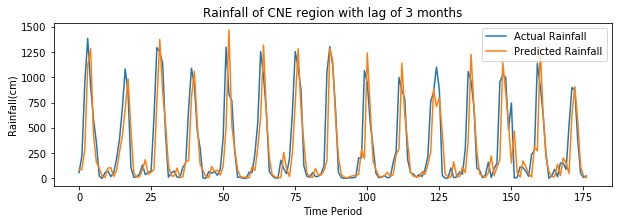

In [146]:
plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months")
plt.legend()
plt.show()

In [147]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE :")
print(RMSE)
print("NSE for CNE:")
print(NSE(y_test,y_pred))

Co-efficient of corelation :
0.807526950750756
RMSE(mm) for CNE :
249.40056278952656
NSE for CNE:
0.5388294140733088


In [162]:
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [163]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_10 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               98432     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 32)              

In [164]:
Emi_test = pd.read_excel("Emi_test.xlsx")
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

In [165]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
8/8 [==============================] - 0s 31ms/step - loss: 279430.5625 - mae: 331.1954 - val_loss: 156478.7344 - val_mae: 254.7918
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 155079.5312 - mae: 260.8718 - val_loss: 122505.2422 - val_mae: 243.6071
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 127268.1953 - mae: 235.6203 - val_loss: 85339.0859 - val_mae: 191.5356
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 97669.7188 - mae: 189.2581 - val_loss: 72058.3438 - val_mae: 168.0644
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 83412.7812 - mae: 177.9255 - val_loss: 67587.5625 - val_mae: 161.5207
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 84927.5000 - mae: 181.2144 - val_loss: 63247.7930 - val_mae: 157.8135
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 83053.9219 - mae: 176.3192 - val_loss: 62633.7422 - val_mae: 157.2723
Epoch 8/10
8/

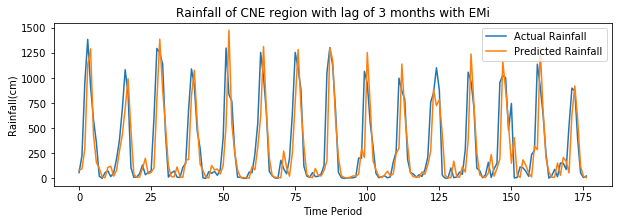

In [166]:
plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months with EMi")
plt.legend()
plt.show()

In [167]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with Emi) :")
print(RMSE)
print("NSE for CNE(with Emi) :")
print(NSE(y_test,y_pred))

Co-efficient of corelation :
0.8128155062317043
RMSE(mm) for CNE(with Emi) :
246.19981329485566
NSE for CNE(with Emi) :
0.5599725138045967


In [168]:
Pdo_train = pd.read_excel("Pdo_train.xlsx")
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_train_arr = np.asarray(Pdo_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
Pdo_train_array = pdo_train_arr.reshape(pdo_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [169]:
Pdo_test = pd.read_excel("Pdo_test.xlsx")
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_test_arr = np.asarray(Pdo_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
pdo_test_array = pdo_test_arr.reshape(pdo_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 78177.8125 - mae: 173.0735 - val_loss: 60070.5078 - val_mae: 154.7455
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 77262.8359 - mae: 172.9006 - val_loss: 59036.2656 - val_mae: 153.6281
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 76837.7656 - mae: 171.7771 - val_loss: 57872.4961 - val_mae: 151.9067
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 77016.6953 - mae: 170.6673 - val_loss: 57951.8125 - val_mae: 152.7820
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 75491.3594 - mae: 169.7710 - val_loss: 57692.1172 - val_mae: 153.6536
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 74895.9297 - mae: 170.2428 - val_loss: 56495.2656 - val_mae: 151.7831
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 73063.9844 - mae: 167.7878 - val_loss: 55887.9727 - val_mae: 152.7097
Epoch 8/10
8/8 [===

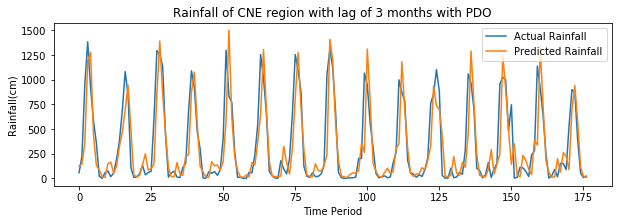

Co-efficient of corelation :
0.8249647781657977
RMSE(mm) for CNE(with pdo) :
235.332490180293
NSE for CNE(with pdo) :
0.6045329749193126


In [170]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months with PDO")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with pdo) :")
print(RMSE)
print("NSE for CNE(with pdo) :")
print(NSE(y_test,y_pred))

In [160]:
Nao_train = pd.read_excel("Nao_train.xlsx")
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_train_arr = np.asarray(Nao_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
nao_train_array = nao_train_arr.reshape(nao_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [172]:
Nao_test = pd.read_excel("Nao_test.xlsx")
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_test_arr = np.asarray(Nao_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
nao_test_array = nao_test_arr.reshape(nao_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 70433.0703 - mae: 167.8482 - val_loss: 53074.3203 - val_mae: 150.2621
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 70352.1328 - mae: 165.3367 - val_loss: 52956.2148 - val_mae: 151.4670
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 68479.8984 - mae: 166.0568 - val_loss: 53075.0352 - val_mae: 152.8083
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 68798.6797 - mae: 169.1013 - val_loss: 51873.1016 - val_mae: 151.0689
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 67353.1562 - mae: 165.0106 - val_loss: 51418.4805 - val_mae: 151.8986
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 66574.7422 - mae: 167.2615 - val_loss: 50259.7266 - val_mae: 151.1354
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 65613.1172 - mae: 163.6003 - val_loss: 50017.4258 - val_mae: 150.4153
Epoch 8/10
8/8 [===

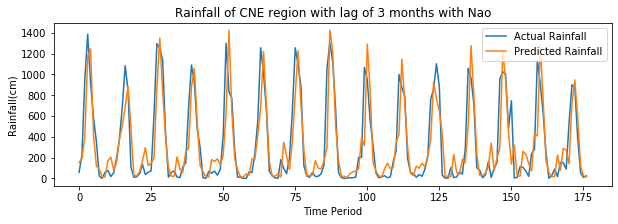

Co-efficient of corelation :
0.838294763797864
RMSE(mm) for CNE(with nao) :
223.90627321189748
NSE for CNE(with nao) :
0.6199425417868849


In [173]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months with Nao")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with nao) :")
print(RMSE)
print("NSE for CNE(with nao) :")
print(NSE(y_test,y_pred))

In [174]:
Nino_train = pd.read_excel("Nino_train.xlsx")
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_train_arr = np.asarray(Nino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
nino_train_array = nino_train_arr.reshape(nino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [175]:
Nino_test = pd.read_excel("Nino_test.xlsx")
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_test_arr = np.asarray(Nino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
nino_test_array = nino_test_arr.reshape(nino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

Epoch 1/10
8/8 [==============================] - 0s 15ms/step - loss: 63408.6367 - mae: 165.9707 - val_loss: 48810.5664 - val_mae: 152.1905
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 62580.3828 - mae: 165.3497 - val_loss: 47655.1406 - val_mae: 150.3387
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 61470.8711 - mae: 162.1886 - val_loss: 46949.8672 - val_mae: 149.8033
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 61180.9375 - mae: 163.5540 - val_loss: 47022.3750 - val_mae: 150.7581
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 60288.9297 - mae: 164.3062 - val_loss: 45533.1914 - val_mae: 149.7049
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 60046.4766 - mae: 161.2587 - val_loss: 44716.9180 - val_mae: 147.2216
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 59307.4414 - mae: 161.2610 - val_loss: 45954.7227 - val_mae: 150.6473
Epoch 8/10
8/8 [=

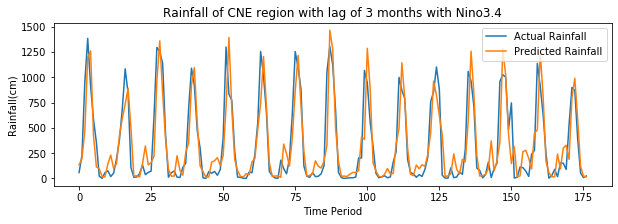

Co-efficient of corelation :
0.8574172923277376
RMSE(mm) for CNE(with Nino3.4) :
211.25951871188866
NSE for CNE(with Nino3.4) :
0.6798855258543157


In [176]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months with Nino3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with Nino3.4) :")
print(RMSE)
print("NSE for CNE(with Nino3.4) :")
print(NSE(y_test,y_pred))

In [185]:
Equino_train = pd.read_excel("Equinoo_train.xlsx")
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [187]:
Equino_test = pd.read_excel("Equinoo_test.xlsx")
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 55139.7930 - mae: 156.8370 - val_loss: 43020.9336 - val_mae: 146.4773
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 55103.4531 - mae: 156.3369 - val_loss: 42615.4102 - val_mae: 144.4416
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 53131.7656 - mae: 155.7649 - val_loss: 42507.9883 - val_mae: 147.3590
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 53789.9688 - mae: 155.1912 - val_loss: 41701.3477 - val_mae: 146.0840
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 51315.3047 - mae: 153.8471 - val_loss: 40380.7734 - val_mae: 139.7026
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 50557.7695 - mae: 150.5641 - val_loss: 40526.9766 - val_mae: 143.7507
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 49463.3711 - mae: 149.7651 - val_loss: 38555.7617 - val_mae: 137.1696
Epoch 8/10
8/8 [===

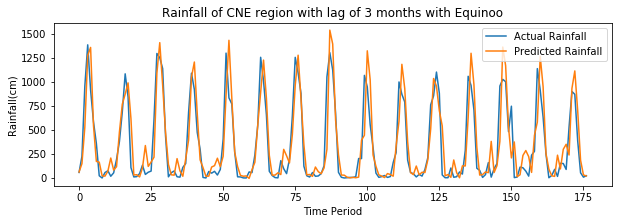

Co-efficient of corelation :
0.8721525526986966
RMSE(mm) for CNE(with Equinoo) :
208.83435357689964
NSE for CNE(with Equinoo) :
0.7437308057411123


In [188]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months with Equinoo")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with Equinoo) :")
print(RMSE)
print("NSE for CNE(with Equinoo) :")
print(NSE(y_test,y_pred))

In [192]:
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [193]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_11 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)              

In [194]:
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

In [195]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
8/8 [==============================] - 1s 100ms/step - loss: 308717.8750 - mae: 345.1152 - val_loss: 192347.4844 - val_mae: 275.5436
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 179698.0625 - mae: 276.2905 - val_loss: 129199.4219 - val_mae: 254.7402
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 132848.8438 - mae: 243.7711 - val_loss: 92684.8828 - val_mae: 201.3346
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 103692.3281 - mae: 196.2368 - val_loss: 72018.5938 - val_mae: 168.4983
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 89778.7422 - mae: 187.1993 - val_loss: 64556.6680 - val_mae: 160.1015
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 83125.8984 - mae: 178.4264 - val_loss: 63071.2148 - val_mae: 159.6082
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 82389.8594 - mae: 177.7204 - val_loss: 61543.3008 - val_mae: 155.8780
Epoch 

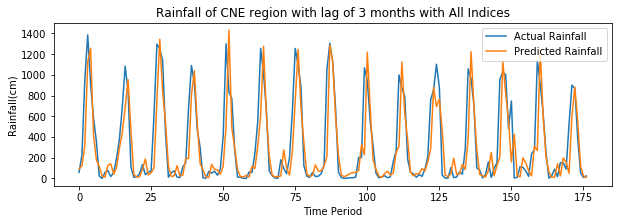

In [196]:
plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 3 months with All Indices")
plt.legend()
plt.show()

In [198]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with All Indices) :")
print(RMSE)
print("NSE for CNE(with All Indeices) :")
print(NSE(y_test,y_pred))

Co-efficient of corelation :
0.8125821392950929
RMSE(mm) for CNE(with All Indices) :
244.02062093958307
NSE for CNE(with All Indeices) :
0.5286817658531171


In [199]:
PE1 = train_data[(train_data.SUBDIVISION == 'COASTAL ANDHRA PRADESH')]
PE2 = train_data[(train_data.SUBDIVISION == 'RAYALSEEMA')]
PE3 = train_data[(train_data.SUBDIVISION == 'TAMIL NADU')]
PE4 = train_data[(train_data.SUBDIVISION == 'COASTAL KARNATAKA')]
PE5 = train_data[(train_data.SUBDIVISION == 'SOUTH INTERIOR KARNATAKA')]
PE6 = train_data[(train_data.SUBDIVISION == 'KERALA')]
PE_train = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])

In [200]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [201]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 3, 64)             192       
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 3, 128)            16512     
_________________________________________________________________
flatten_12 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 32)              

In [202]:
PE1 = test_data[(test_data.SUBDIVISION == 'COASTAL ANDHRA PRADESH')]
PE2 = test_data[(test_data.SUBDIVISION == 'RAYALSEEMA')]
PE3 = test_data[(test_data.SUBDIVISION == 'TAMIL NADU')]
PE4 = test_data[(test_data.SUBDIVISION == 'COASTAL KARNATAKA')]
PE5 = test_data[(test_data.SUBDIVISION == 'SOUTH INTERIOR KARNATAKA')]
PE6 = test_data[(test_data.SUBDIVISION == 'KERALA')]
PE_test = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])

In [203]:
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 1301164.5000 - mae: 802.6255 - val_loss: 1102037.7500 - val_mae: 708.3485
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 783756.6875 - mae: 590.4968 - val_loss: 614222.3125 - val_mae: 524.4198
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 516228.2812 - mae: 513.4847 - val_loss: 605351.4375 - val_mae: 583.8406
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 478494.4688 - mae: 496.2102 - val_loss: 507589.5312 - val_mae: 485.4080
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 441951.1875 - mae: 447.5587 - val_loss: 492650.4688 - val_mae: 464.2107
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 414397.0625 - mae: 434.7403 - val_loss: 471495.7812 - val_mae: 470.2704
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 409748.4375 - mae: 436.4186 - val_loss: 461805.5000 - val_mae: 461.9987
Epo

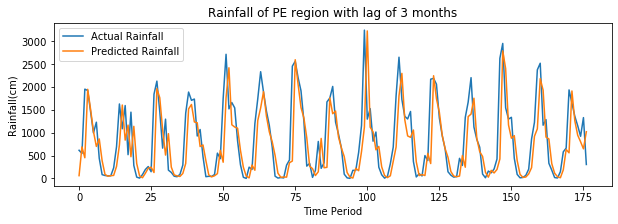

Co-efficient of corelation :
0.707685780313676
RMSE(mm) for PE :
588.0332503267574
NSE for PE:
0.250007826445679


In [204]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE :")
print(RMSE)
print("NSE for PE:")
print(NSE(y_test,y_pred))

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_14 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               98432     
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_58 (Dense)             (None, 32)              

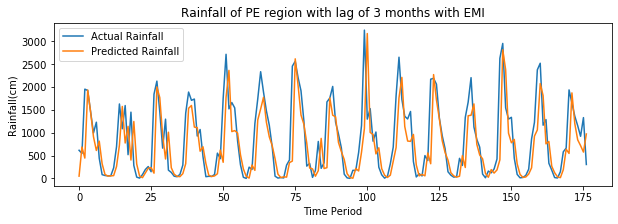

Co-efficient of corelation :
0.7091149494120683
RMSE(mm) for PE(with Emi) :
593.463703755969
NSE for PE(with Emi) :
0.2000234698705231


In [206]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months with EMI")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with Emi) :")
print(RMSE)
print("NSE for PE(with Emi) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 10ms/step - loss: 377096.3125 - mae: 413.0802 - val_loss: 430062.0938 - val_mae: 438.1278
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 369296.5312 - mae: 408.2585 - val_loss: 422165.1250 - val_mae: 428.6721
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 365822.0312 - mae: 405.5163 - val_loss: 417950.0312 - val_mae: 429.0818
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 362381.4688 - mae: 403.2401 - val_loss: 414450.3438 - val_mae: 428.7552
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 364140.3438 - mae: 404.1421 - val_loss: 410390.0000 - val_mae: 424.6689
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 356158.9062 - mae: 399.1009 - val_loss: 406373.8750 - val_mae: 413.7980
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 360881.8750 - mae: 403.4392 - val_loss: 407297.4062 - val_mae: 427.1920
Epoch

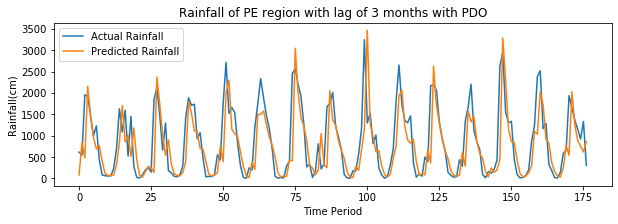

Co-efficient of corelation :
0.7137499350555475
RMSE(mm) for PE(with pdo) :
581.0822477158072
NSE for PE(with pdo) :
0.29450991492963385


In [207]:
#Pdo_train = pd.read_excel("Pdo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_train_arr = np.asarray(Pdo_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Pdo_train_array = pdo_train_arr.reshape(pdo_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Pdo_test = pd.read_excel("Pdo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_test_arr = np.asarray(Pdo_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
pdo_test_array = pdo_test_arr.reshape(pdo_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months with PDO")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with pdo) :")
print(RMSE)
print("NSE for PE(with pdo) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 351192.0312 - mae: 394.3388 - val_loss: 395771.5312 - val_mae: 403.1209
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 347297.9688 - mae: 393.4912 - val_loss: 398242.8125 - val_mae: 427.6136
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 345125.5938 - mae: 392.7224 - val_loss: 390022.6562 - val_mae: 414.2872
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 340816.0000 - mae: 388.0919 - val_loss: 387414.6875 - val_mae: 408.3951
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 344788.6562 - mae: 393.0433 - val_loss: 387322.8125 - val_mae: 417.5419
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 337171.1562 - mae: 385.7776 - val_loss: 382757.1562 - val_mae: 403.7441
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 336526.2812 - mae: 383.3765 - val_loss: 382169.6562 - val_mae: 414.6185
Epoch

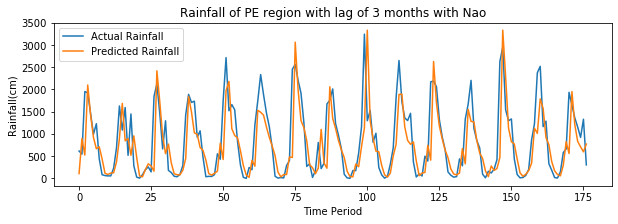

Co-efficient of corelation :
0.7209595308561767
RMSE(mm) for PE(with nao) :
571.3425372381766
NSE for PE(with nao) :
0.2640592970240352


In [208]:
#Nao_train = pd.read_excel("Nao_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_train_arr = np.asarray(Nao_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nao_train_array = nao_train_arr.reshape(nao_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nao_test = pd.read_excel("Nao_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_test_arr = np.asarray(Nao_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nao_test_array = nao_test_arr.reshape(nao_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months with Nao")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with nao) :")
print(RMSE)
print("NSE for PE(with nao) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 327814.4688 - mae: 380.9614 - val_loss: 369134.5312 - val_mae: 408.8201
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 325317.3750 - mae: 376.4177 - val_loss: 366327.1562 - val_mae: 392.2369
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 325181.8125 - mae: 378.9318 - val_loss: 367361.5312 - val_mae: 415.1876
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 320275.4062 - mae: 378.6250 - val_loss: 361014.3125 - val_mae: 404.0787
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 318036.6250 - mae: 373.8432 - val_loss: 357389.3125 - val_mae: 396.8766
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 317134.6250 - mae: 374.0426 - val_loss: 357338.9688 - val_mae: 403.7272
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 315809.3750 - mae: 370.4442 - val_loss: 351932.8125 - val_mae: 394.7335
Epoch

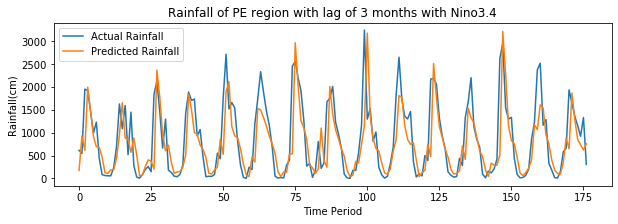

Co-efficient of corelation :
0.7327064996222269
RMSE(mm) for PE(with Nino3.4) :
553.2568830975106
NSE for PE(with Nino3.4) :
0.24516383397424102


In [209]:
#Nino_train = pd.read_excel("Nino_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_train_arr = np.asarray(Nino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nino_train_array = nino_train_arr.reshape(nino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nino_test = pd.read_excel("Nino_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_test_arr = np.asarray(Nino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nino_test_array = nino_test_arr.reshape(nino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months with Nino3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with Nino3.4) :")
print(RMSE)
print("NSE for PE(with Nino3.4) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 10ms/step - loss: 313329.3125 - mae: 380.3312 - val_loss: 354551.1562 - val_mae: 416.8908
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 309436.4062 - mae: 372.8064 - val_loss: 349489.3125 - val_mae: 373.0973
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 305310.1250 - mae: 368.8899 - val_loss: 343302.4062 - val_mae: 407.0968
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 301362.8125 - mae: 374.0111 - val_loss: 336252.8125 - val_mae: 392.6313
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 295307.6875 - mae: 362.3669 - val_loss: 333748.0625 - val_mae: 380.5999
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 294011.0938 - mae: 361.7570 - val_loss: 329255.3438 - val_mae: 387.4723
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 290092.7188 - mae: 363.4494 - val_loss: 327566.8750 - val_mae: 392.2416
Epoch

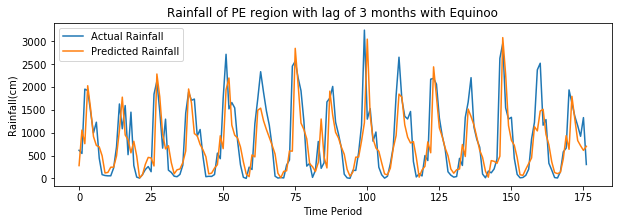

Co-efficient of corelation :
0.7399129361388357
RMSE(mm) for PE(with Equinoo) :
541.8461454345887
NSE for PE(with Equinoo) :
0.23517925250384786


In [210]:
#Equino_train = pd.read_excel("Equinoo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Equino_test = pd.read_excel("Equinoo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months with Equinoo")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with Equinoo) :")
print(RMSE)
print("NSE for PE(with Equinoo) :")
print(NSE(y_test,y_pred))

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_15 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_61 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_62 (Dense)             (None, 32)              

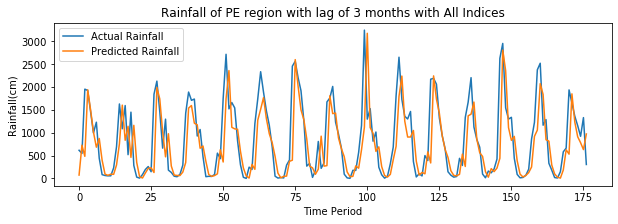

Co-efficient of corelation :
0.7105286423045467
RMSE(mm) for PE(with All Indices) :
583.3278591044774
NSE for PE(with All Indeices) :
0.22344016568415126


In [211]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 3 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with All Indices) :")
print(RMSE)
print("NSE for PE(with All Indeices) :")
print(NSE(y_test,y_pred))

In [212]:
PE1 = train_data[(train_data.SUBDIVISION == 'HARYANA DELHI & CHANDIGARH')]
PE2 = train_data[(train_data.SUBDIVISION == 'PUNJAB')]
PE3 = train_data[(train_data.SUBDIVISION == 'WEST RAJASTHAN')]
PE4 = train_data[(train_data.SUBDIVISION == 'EAST RAJASTHAN')]
PE5 = train_data[(train_data.SUBDIVISION == 'GUJARAT REGION')]
PE6 = train_data[(train_data.SUBDIVISION == 'SAURASHTRA & KUTCH')]
PE_train = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])

In [218]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [219]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 3, 64)             192       
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 3, 128)            16512     
_________________________________________________________________
flatten_17 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 32)              

In [217]:
PE1 = test_data[(test_data.SUBDIVISION == 'HARYANA DELHI & CHANDIGARH')]
PE2 = test_data[(test_data.SUBDIVISION == 'PUNJAB')]
PE3 = test_data[(test_data.SUBDIVISION == 'WEST RAJASTHAN')]
PE4 = test_data[(test_data.SUBDIVISION == 'EAST RAJASTHAN')]
PE5 = test_data[(test_data.SUBDIVISION == 'GUJARAT REGION')]
PE6 = test_data[(test_data.SUBDIVISION == 'SAURASHTRA & KUTCH')]
PE_test = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])

Epoch 1/10
8/8 [==============================] - 0s 10ms/step - loss: 119951.9688 - mae: 199.0656 - val_loss: 118800.1172 - val_mae: 183.3361
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 121547.8594 - mae: 201.9865 - val_loss: 120820.0234 - val_mae: 185.3562
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 118830.8438 - mae: 196.0318 - val_loss: 117257.4531 - val_mae: 180.3885
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 117235.4141 - mae: 196.3241 - val_loss: 116833.0391 - val_mae: 183.1693
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 115606.1719 - mae: 195.6614 - val_loss: 116511.2031 - val_mae: 182.7601
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 114644.3594 - mae: 195.8540 - val_loss: 116526.0312 - val_mae: 184.7922
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 113532.4062 - mae: 196.3453 - val_loss: 113933.0469 - val_mae: 182.9824
Epoch

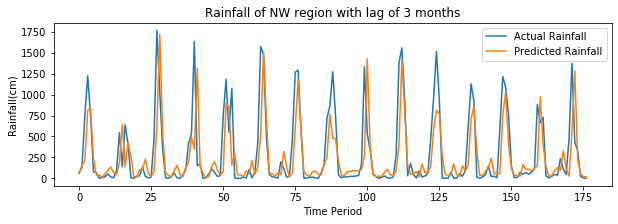

Co-efficient of corelation :
0.6910137271951243
RMSE(mm) for NW :
322.6698332670285
NSE for NW:
0.054888793453716445


In [221]:
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW :")
print(RMSE)
print("NSE for NW:")
print(NSE(y_test,y_pred))

Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_19 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               98432     
_________________________________________________________________
dense_77 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_78 (Dense)             (None, 32)              

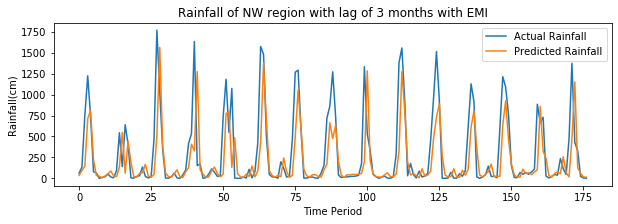

Co-efficient of corelation :
0.671716095358083
RMSE(mm) for NW(with Emi) :
336.8388842117246
NSE for NW(with Emi) :
-0.16715653268985742


In [223]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months with EMI")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with Emi) :")
print(RMSE)
print("NSE for NW(with Emi) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 125034.4688 - mae: 204.7047 - val_loss: 119363.6641 - val_mae: 183.9886
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 120664.0859 - mae: 198.7570 - val_loss: 116117.5703 - val_mae: 177.8132
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 119786.0078 - mae: 196.1930 - val_loss: 116371.1797 - val_mae: 180.7351
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 118240.0156 - mae: 197.1290 - val_loss: 115811.8516 - val_mae: 180.9141
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 116923.1250 - mae: 198.2829 - val_loss: 116824.1484 - val_mae: 183.9947
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 115978.8438 - mae: 198.6293 - val_loss: 114843.8594 - val_mae: 181.9130
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 115891.6406 - mae: 195.3672 - val_loss: 113304.5703 - val_mae: 179.0094
Epoch

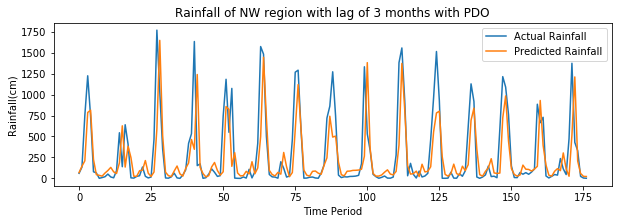

Co-efficient of corelation :
0.6925389684736406
RMSE(mm) for NW(with pdo) :
321.8444883694753
NSE for NW(with pdo) :
-0.01876720162721024


In [224]:
#Pdo_train = pd.read_excel("Pdo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_train_arr = np.asarray(Pdo_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Pdo_train_array = pdo_train_arr.reshape(pdo_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Pdo_test = pd.read_excel("Pdo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_test_arr = np.asarray(Pdo_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
pdo_test_array = pdo_test_arr.reshape(pdo_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months with PDO")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with pdo) :")
print(RMSE)
print("NSE for NW(with pdo) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 111317.4922 - mae: 196.2216 - val_loss: 111493.3047 - val_mae: 183.1302
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 110842.4922 - mae: 197.4150 - val_loss: 110246.6484 - val_mae: 183.5620
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 109252.9141 - mae: 196.9142 - val_loss: 109356.3359 - val_mae: 184.3584
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 108367.0234 - mae: 197.8241 - val_loss: 108700.4141 - val_mae: 185.6207
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 107390.9688 - mae: 196.7053 - val_loss: 108064.8906 - val_mae: 186.7065
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 106319.5859 - mae: 196.7193 - val_loss: 108063.0312 - val_mae: 188.5586
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 105707.3906 - mae: 197.4368 - val_loss: 107131.0078 - val_mae: 189.9891
Epoch

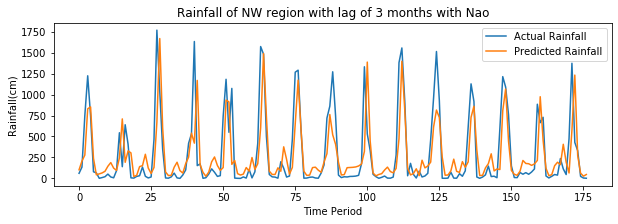

Co-efficient of corelation :
0.7106073649663637
RMSE(mm) for NW(with nao) :
309.8620283762835
NSE for NW(with nao) :
0.06881579888975786


In [225]:
#Nao_train = pd.read_excel("Nao_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_train_arr = np.asarray(Nao_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nao_train_array = nao_train_arr.reshape(nao_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nao_test = pd.read_excel("Nao_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_test_arr = np.asarray(Nao_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nao_test_array = nao_test_arr.reshape(nao_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months with Nao")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with nao) :")
print(RMSE)
print("NSE for NW(with nao) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 13ms/step - loss: 103007.9062 - mae: 201.3674 - val_loss: 103507.7344 - val_mae: 193.8840
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 101983.8438 - mae: 199.8878 - val_loss: 102804.2969 - val_mae: 194.4034
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 100668.5078 - mae: 198.5547 - val_loss: 101081.3203 - val_mae: 192.7680
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 100776.8203 - mae: 198.8129 - val_loss: 102698.7812 - val_mae: 196.1990
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 102170.2031 - mae: 203.4017 - val_loss: 100411.2266 - val_mae: 194.3789
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 99230.5156 - mae: 197.5002 - val_loss: 98777.7031 - val_mae: 193.2608
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 97769.9531 - mae: 197.9912 - val_loss: 99776.8516 - val_mae: 196.8096
Epoch 8/

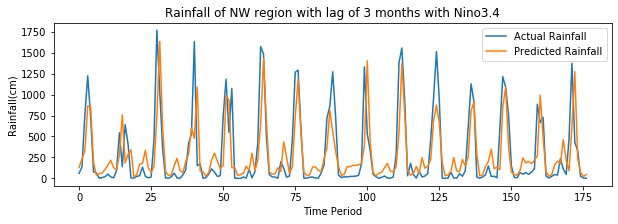

Co-efficient of corelation :
0.7287440784542147
RMSE(mm) for NW(with Nino3.4) :
300.9635864852017
NSE for NW(with Nino3.4) :
0.13511120429783974


In [226]:
#Nino_train = pd.read_excel("Nino_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_train_arr = np.asarray(Nino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nino_train_array = nino_train_arr.reshape(nino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nino_test = pd.read_excel("Nino_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_test_arr = np.asarray(Nino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nino_test_array = nino_test_arr.reshape(nino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months with Nino3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with Nino3.4) :")
print(RMSE)
print("NSE for NW(with Nino3.4) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 95024.5703 - mae: 197.7592 - val_loss: 97201.9531 - val_mae: 194.7825
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 96214.8906 - mae: 194.6428 - val_loss: 94825.7969 - val_mae: 191.3305
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 93492.3438 - mae: 196.3883 - val_loss: 98148.2969 - val_mae: 196.1380
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 95827.7422 - mae: 195.5646 - val_loss: 92255.4609 - val_mae: 188.7325
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 92379.8906 - mae: 193.2857 - val_loss: 94783.1484 - val_mae: 193.6994
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 91367.7500 - mae: 193.0921 - val_loss: 89458.3359 - val_mae: 186.4760
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 90858.2734 - mae: 192.8766 - val_loss: 91932.7578 - val_mae: 189.9346
Epoch 8/10
8/8 [===

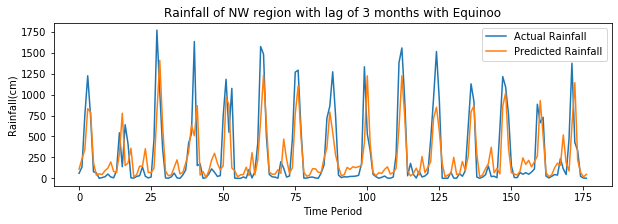

Co-efficient of corelation :
0.7572194289928608
RMSE(mm) for NW(with Equinoo) :
289.6184949983098
NSE for NW(with Equinoo) :
0.09558123140682895


In [227]:
#Equino_train = pd.read_excel("Equinoo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Equino_test = pd.read_excel("Equinoo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months with Equinoo")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with Equinoo) :")
print(RMSE)
print("NSE for NW(with Equinoo) :")
print(NSE(y_test,y_pred))

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_20 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_81 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_82 (Dense)             (None, 32)              

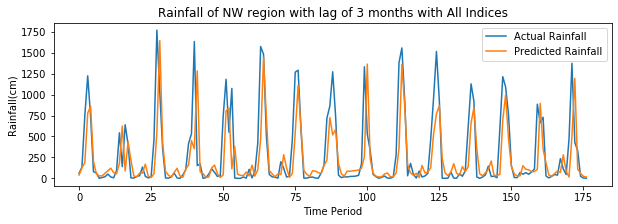

Co-efficient of corelation :
0.6816892202830553
RMSE(mm) for NW(with All Indices) :
328.57289520805796
NSE for NW(with All Indeices) :
-0.04303331588353698


In [228]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 3 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with All Indices) :")
print(RMSE)
print("NSE for NW(with All Indeices) :")
print(NSE(y_test,y_pred))

In [229]:
PE1 = train_data[(train_data.SUBDIVISION == 'ASSAM & MEGHALAYA')]
PE2 = train_data[(train_data.SUBDIVISION == 'SUB HIMALAYAN WEST BENGAL & SIKKIM')]
PE3 = train_data[(train_data.SUBDIVISION == 'GANGETIC WEST BENGAL')]
PE_train = pd.concat([PE1,PE2,PE3])

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 3, 64)             192       
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 3, 128)            16512     
_________________________________________________________________
flatten_21 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_85 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_86 (Dense)             (None, 32)              

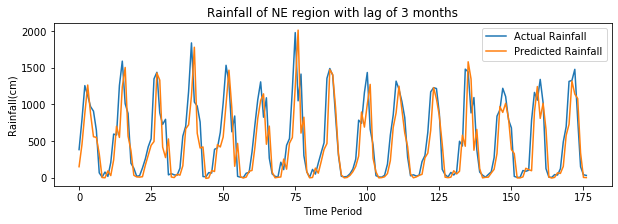

Co-efficient of corelation :
0.8057134369002927
RMSE(mm) for NE :
320.4042348750794
NSE for NE:
0.5208678106130917


In [230]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

PE1 = test_data[(test_data.SUBDIVISION == 'ASSAM & MEGHALAYA')]
PE2 = test_data[(test_data.SUBDIVISION == 'SUB HIMALAYAN WEST BENGAL & SIKKIM')]
PE3 = test_data[(test_data.SUBDIVISION == 'GANGETIC WEST BENGAL')]
PE_test = pd.concat([PE1,PE2,PE3])

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE :")
print(RMSE)
print("NSE for NE:")
print(NSE(y_test,y_pred))

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_22 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               98432     
_________________________________________________________________
dense_89 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_90 (Dense)             (None, 32)              

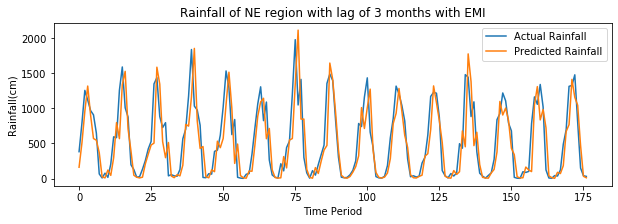

Co-efficient of corelation :
0.8123036191497894
RMSE(mm) for NE(with Emi) :
310.0378061922231
NSE for NE(with Emi) :
0.5858996609350691


In [231]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months with EMI")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE(with Emi) :")
print(RMSE)
print("NSE for NE(with Emi) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 92234.7500 - mae: 210.4928 - val_loss: 75273.6328 - val_mae: 184.2282
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 89434.9609 - mae: 206.9234 - val_loss: 74410.2812 - val_mae: 183.2773
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 86749.6953 - mae: 205.0738 - val_loss: 73956.8594 - val_mae: 183.2991
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 85772.2109 - mae: 203.7333 - val_loss: 73561.4609 - val_mae: 183.1004
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 83224.3203 - mae: 201.9279 - val_loss: 72177.0078 - val_mae: 181.5181
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 83337.7266 - mae: 200.6934 - val_loss: 72891.8984 - val_mae: 183.0342
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 81558.7422 - mae: 197.8598 - val_loss: 72061.7500 - val_mae: 182.1600
Epoch 8/10
8/8 [===

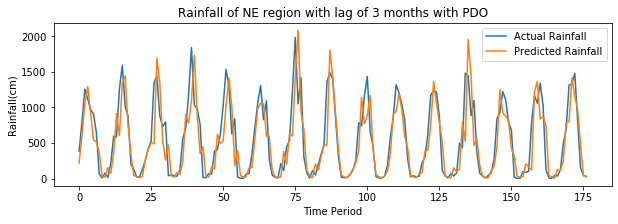

Co-efficient of corelation :
0.8181172486699333
RMSE(mm) for NE(with pdo) :
302.610467873463
NSE for NE(with pdo) :
0.6027472184187295


In [232]:
#Pdo_train = pd.read_excel("Pdo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_train_arr = np.asarray(Pdo_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Pdo_train_array = pdo_train_arr.reshape(pdo_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Pdo_test = pd.read_excel("Pdo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_test_arr = np.asarray(Pdo_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
pdo_test_array = pdo_test_arr.reshape(pdo_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months with PDO")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE(with pdo) :")
print(RMSE)
print("NSE for NE(with pdo) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 77850.9453 - mae: 193.3256 - val_loss: 70956.8906 - val_mae: 180.8818
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 78886.5469 - mae: 193.1978 - val_loss: 71676.5469 - val_mae: 181.7344
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 77071.5781 - mae: 189.3502 - val_loss: 69914.1641 - val_mae: 179.3109
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 77088.0156 - mae: 190.4858 - val_loss: 70428.0547 - val_mae: 180.5295
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 74944.0859 - mae: 189.6155 - val_loss: 69878.9844 - val_mae: 179.6669
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 74243.7891 - mae: 188.0436 - val_loss: 68206.6641 - val_mae: 177.8093
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 74541.8984 - mae: 187.9021 - val_loss: 68366.5078 - val_mae: 178.2450
Epoch 8/10
8/8 [===

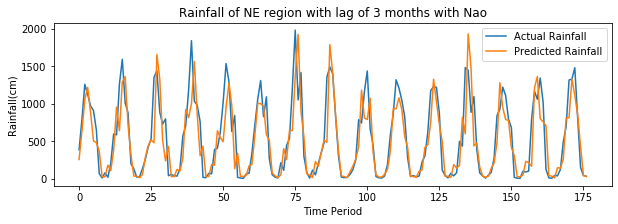

Co-efficient of corelation :
0.8230763267825567
RMSE(mm) for NE(with nao) :
296.0537524549899
NSE for NE(with nao) :
0.5821499764202296


In [233]:
#Nao_train = pd.read_excel("Nao_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_train_arr = np.asarray(Nao_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nao_train_array = nao_train_arr.reshape(nao_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nao_test = pd.read_excel("Nao_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_test_arr = np.asarray(Nao_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nao_test_array = nao_test_arr.reshape(nao_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months with Nao")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE(with nao) :")
print(RMSE)
print("NSE for NE(with nao) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 13ms/step - loss: 71120.0469 - mae: 182.1561 - val_loss: 65441.8672 - val_mae: 175.4633
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 71397.1172 - mae: 183.9773 - val_loss: 66234.4141 - val_mae: 176.9266
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 71011.0469 - mae: 184.0032 - val_loss: 65958.4219 - val_mae: 177.1276
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 69845.1875 - mae: 180.5106 - val_loss: 65663.3203 - val_mae: 177.1278
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 69381.6172 - mae: 179.9209 - val_loss: 65645.7188 - val_mae: 177.2041
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 68688.2812 - mae: 182.1697 - val_loss: 64073.2148 - val_mae: 176.3004
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 69932.8906 - mae: 179.5530 - val_loss: 64276.1367 - val_mae: 176.5588
Epoch 8/10
8/8 [===

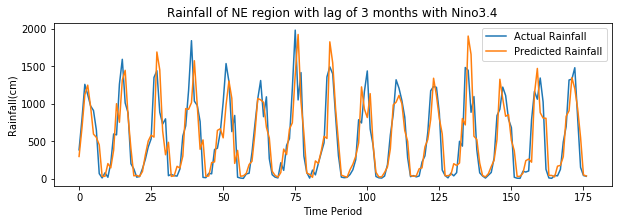

Co-efficient of corelation :
0.8328897358105141
RMSE(mm) for NE(with Nino3.4) :
286.04838934936447
NSE for NE(with Nino3.4) :
0.6328836091784902


In [234]:
#Nino_train = pd.read_excel("Nino_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_train_arr = np.asarray(Nino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nino_train_array = nino_train_arr.reshape(nino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nino_test = pd.read_excel("Nino_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_test_arr = np.asarray(Nino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nino_test_array = nino_test_arr.reshape(nino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months with Nino3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE(with Nino3.4) :")
print(RMSE)
print("NSE for NE(with Nino3.4) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 65445.7227 - mae: 176.9042 - val_loss: 63377.4531 - val_mae: 176.0002
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 65445.7812 - mae: 174.9348 - val_loss: 63062.8672 - val_mae: 176.1177
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 64466.4102 - mae: 173.6074 - val_loss: 62076.3516 - val_mae: 175.2777
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 63358.1250 - mae: 173.3230 - val_loss: 61215.3398 - val_mae: 174.1874
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 64107.9922 - mae: 174.6595 - val_loss: 61107.3828 - val_mae: 174.4876
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 63169.5625 - mae: 172.3810 - val_loss: 61609.8750 - val_mae: 175.5844
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 62808.5391 - mae: 172.5015 - val_loss: 60771.3008 - val_mae: 174.3920
Epoch 8/10
8/8 [===

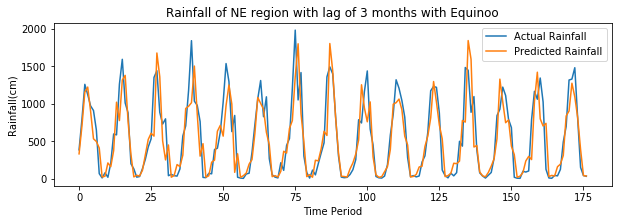

Co-efficient of corelation :
0.8359113553245335
RMSE(mm) for NE(with Equinoo) :
282.4763367595327
NSE for NE(with Equinoo) :
0.6138457081623109


In [235]:
#Equino_train = pd.read_excel("Equinoo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Equino_test = pd.read_excel("Equinoo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months with Equinoo")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE(with Equinoo) :")
print(RMSE)
print("NSE for NE(with Equinoo) :")
print(NSE(y_test,y_pred))

Model: "functional_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_23 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_93 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_94 (Dense)             (None, 32)              

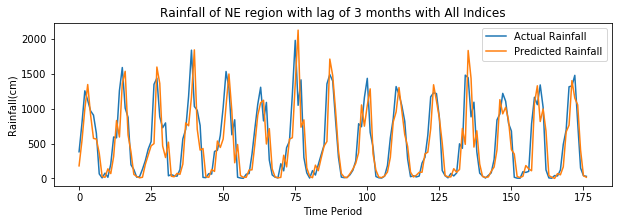

Co-efficient of corelation :
0.8112198975375616
RMSE(mm) for NE(with All Indices) :
309.32666676312664
NSE for NE(with All Indeices) :
0.5884211068252265


In [236]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NE region with lag of 3 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NE(with All Indices) :")
print(RMSE)
print("NSE for NE(with All Indeices) :")
print(NSE(y_test,y_pred))

In [237]:
PE1 = train_data[(train_data.SUBDIVISION == 'WEST MADHYA PRADESH')]
PE2 = train_data[(train_data.SUBDIVISION == 'EAST MADHYA PRADESH')]
PE3 = train_data[(train_data.SUBDIVISION == 'KONKAN & GOA')]
PE4 = train_data[(train_data.SUBDIVISION == 'MADHYA MAHARASHTRA')]
PE5 = train_data[(train_data.SUBDIVISION == 'MATATHWADA')]
PE6 = train_data[(train_data.SUBDIVISION == 'VIDARBHA')]
PE7 = train_data[(train_data.SUBDIVISION == 'TELANGANA')]
PE8 = train_data[(train_data.SUBDIVISION == 'NORTH INTERIOR KARNATAKA')]
PE_train = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8])

Model: "functional_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 3, 64)             192       
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 3, 128)            16512     
_________________________________________________________________
flatten_24 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_98 (Dense)             (None, 32)              

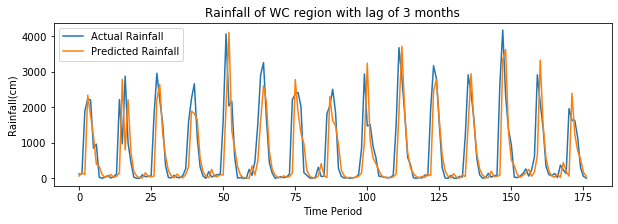

Co-efficient of corelation :
0.7445183857082139
RMSE(mm) for WC :
724.7780227022843
NSE for WC:
0.39247319232742317


In [238]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

PE1 = test_data[(test_data.SUBDIVISION == 'WEST MADHYA PRADESH')]
PE2 = test_data[(test_data.SUBDIVISION == 'EAST MADHYA PRADESH')]
PE3 = test_data[(test_data.SUBDIVISION == 'KONKAN & GOA')]
PE4 = test_data[(test_data.SUBDIVISION == 'MADHYA MAHARASHTRA')]
PE5 = test_data[(test_data.SUBDIVISION == 'MATATHWADA')]
PE6 = test_data[(test_data.SUBDIVISION == 'VIDARBHA')]
PE7 = test_data[(test_data.SUBDIVISION == 'TELANGANA')]
PE8 = test_data[(test_data.SUBDIVISION == 'NORTH INTERIOR KARNATAKA')]
PE_test = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8])

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC :")
print(RMSE)
print("NSE for WC:")
print(NSE(y_test,y_pred))

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_25 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 128)               98432     
_________________________________________________________________
dense_101 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_102 (Dense)            (None, 32)              

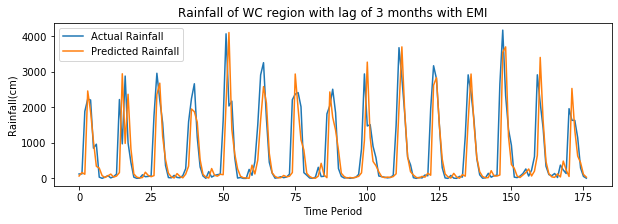

Co-efficient of corelation :
0.7551875748161132
RMSE(mm) for WC(with Emi) :
717.0212447286564
NSE for WC(with Emi) :
0.4378070258915092


In [239]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = Emi_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months with EMI")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with Emi) :")
print(RMSE)
print("NSE for WC(with Emi) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 449559.4688 - mae: 394.1729 - val_loss: 381847.9375 - val_mae: 371.1338
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 430536.8125 - mae: 389.6693 - val_loss: 378948.9375 - val_mae: 373.9780
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 420754.8438 - mae: 386.3619 - val_loss: 365319.3438 - val_mae: 363.5082
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 417147.1250 - mae: 381.7845 - val_loss: 356528.4688 - val_mae: 359.0855
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 406310.7500 - mae: 376.5960 - val_loss: 350457.7188 - val_mae: 357.8209
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 399787.4688 - mae: 375.4785 - val_loss: 345299.1875 - val_mae: 356.8454
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 394013.7188 - mae: 372.0390 - val_loss: 337268.5000 - val_mae: 353.0050
Epoch

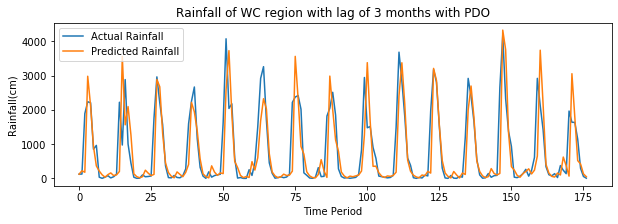

Co-efficient of corelation :
0.7716657130538243
RMSE(mm) for WC(with pdo) :
703.0476452234082
NSE for WC(with pdo) :
0.5357399474905593


In [240]:
#Pdo_train = pd.read_excel("Pdo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_train_arr = np.asarray(Pdo_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Pdo_train_array = pdo_train_arr.reshape(pdo_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = Pdo_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Pdo_test = pd.read_excel("Pdo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
pdo_test_arr = np.asarray(Pdo_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
pdo_test_array = pdo_test_arr.reshape(pdo_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = pdo_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months with PDO")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with pdo) :")
print(RMSE)
print("NSE for WC(with pdo) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 376128.0312 - mae: 364.6309 - val_loss: 315572.9062 - val_mae: 342.3017
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 371385.5625 - mae: 364.2402 - val_loss: 322448.5000 - val_mae: 355.5519
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 369063.7812 - mae: 367.2987 - val_loss: 309118.7188 - val_mae: 343.6451
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 365170.9375 - mae: 360.9544 - val_loss: 309050.4062 - val_mae: 347.6593
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 365133.6250 - mae: 367.0271 - val_loss: 306855.4688 - val_mae: 348.6302
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 359313.7500 - mae: 361.6936 - val_loss: 300985.7188 - val_mae: 344.1584
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 357620.5000 - mae: 363.2199 - val_loss: 301083.0312 - val_mae: 349.6435
Epoc

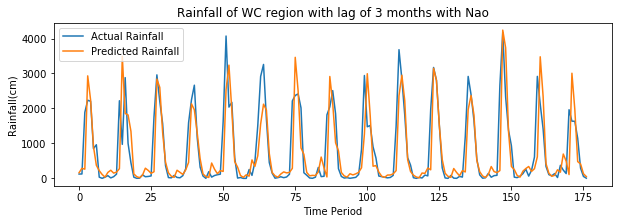

Co-efficient of corelation :
0.7787156960524135
RMSE(mm) for WC(with nao) :
677.3470695188976
NSE for WC(with nao) :
0.5281832843217955


In [241]:
#Nao_train = pd.read_excel("Nao_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_train_arr = np.asarray(Nao_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nao_train_array = nao_train_arr.reshape(nao_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nao_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nao_test = pd.read_excel("Nao_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nao_test_arr = np.asarray(Nao_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nao_test_array = nao_test_arr.reshape(nao_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nao_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months with Nao")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with nao) :")
print(RMSE)
print("NSE for WC(with nao) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 361482.3438 - mae: 378.1393 - val_loss: 293387.5938 - val_mae: 350.3682
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 348876.4688 - mae: 363.9042 - val_loss: 287828.5000 - val_mae: 347.3443
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 346841.6875 - mae: 364.9023 - val_loss: 291697.3438 - val_mae: 354.1398
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 345457.7188 - mae: 369.7694 - val_loss: 285556.0000 - val_mae: 349.8109
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 341355.5000 - mae: 366.8982 - val_loss: 287029.5000 - val_mae: 353.4652
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 341324.0938 - mae: 373.0168 - val_loss: 288790.7188 - val_mae: 357.3967
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 340969.7500 - mae: 369.5427 - val_loss: 283590.5000 - val_mae: 353.9517
Epoch

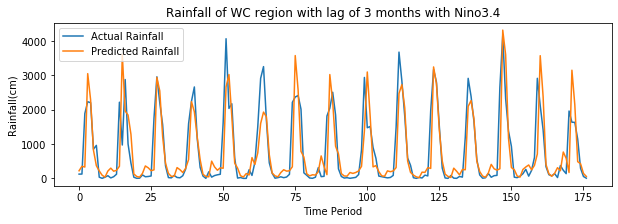

Co-efficient of corelation :
0.7812367109565562
RMSE(mm) for WC(with Nino3.4) :
670.8464124674479
NSE for WC(with Nino3.4) :
0.5340424636584894


In [242]:
#Nino_train = pd.read_excel("Nino_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_train_arr = np.asarray(Nino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
nino_train_array = nino_train_arr.reshape(nino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = nino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Nino_test = pd.read_excel("Nino_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
nino_test_arr = np.asarray(Nino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
nino_test_array = nino_test_arr.reshape(nino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = nino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months with Nino3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with Nino3.4) :")
print(RMSE)
print("NSE for WC(with Nino3.4) :")
print(NSE(y_test,y_pred))

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 333171.6562 - mae: 374.9781 - val_loss: 280069.0938 - val_mae: 356.6183
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 328420.3750 - mae: 370.9211 - val_loss: 271907.9375 - val_mae: 346.9070
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 328228.6562 - mae: 369.0129 - val_loss: 273910.1562 - val_mae: 354.0067
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 327680.7500 - mae: 373.3428 - val_loss: 273055.8125 - val_mae: 354.8257
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 331069.9062 - mae: 381.0851 - val_loss: 269183.1562 - val_mae: 352.4883
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 324101.3750 - mae: 370.1776 - val_loss: 270645.9688 - val_mae: 356.4154
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 325118.2812 - mae: 375.1582 - val_loss: 271620.8438 - val_mae: 359.0638
Epoch

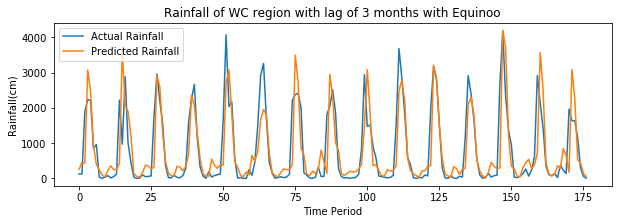

Co-efficient of corelation :
0.7853496787834181
RMSE(mm) for WC(with Equinoo) :
663.6454349452009
NSE for WC(with Equinoo) :
0.5450282248536971


In [243]:
#Equino_train = pd.read_excel("Equinoo_train.xlsx")
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

#Equino_test = pd.read_excel("Equinoo_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months with Equinoo")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with Equinoo) :")
print(RMSE)
print("NSE for WC(with Equinoo) :")
print(NSE(y_test,y_pred))

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_26 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_105 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_106 (Dense)            (None, 32)              

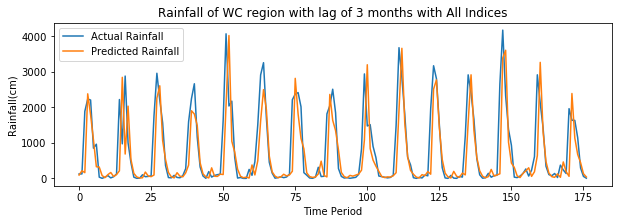

Co-efficient of corelation :
0.7507124933683925
RMSE(mm) for WC(with All Indices) :
717.2730135804055
NSE for WC(with All Indeices) :
0.37748231719639247


In [244]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+3]
    else :
        temp1 = train_array[i:i+3].reshape(1,3)
        X_train1 = equino_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+3].reshape(1,3)
        X_train3 = nao_train_array[i:i+3].reshape(1,3)
        X_train4 = Pdo_train_array[i:i+3].reshape(1,3)
        X_train5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+3]
    else :
        temp1 = test_array[i:i+3].reshape(1,3)
        X_test1 = equino_test_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+3].reshape(1,3)
        X_test3 = nao_test_array[i:i+3].reshape(1,3)
        X_test4 = pdo_test_array[i:i+3].reshape(1,3)
        X_test5 = Emi_train_array[i:i+3].reshape(1,3)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 3 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(177,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with All Indices) :")
print(RMSE)
print("NSE for WC(with All Indeices) :")
print(NSE(y_test,y_pred))

Model: "functional_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_27 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 128)               98432     
_________________________________________________________________
dense_109 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_110 (Dense)            (None, 32)              

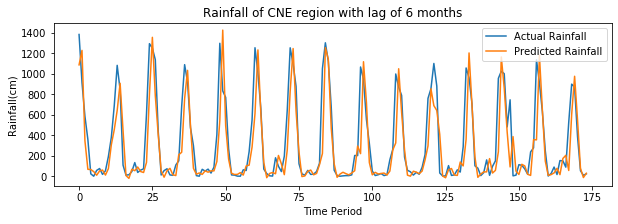

Co-efficient of corelation :
0.8368138368586044
RMSE(mm) for CNE :
234.43882000063405
NSE for CNE:
0.5749120916678725


In [245]:
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()


temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 6 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE :")
print(RMSE)
print("NSE for CNE:")
print(NSE(y_test,y_pred))

Model: "functional_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 24, 1)]           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 24, 64)            192       
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 24, 128)           16512     
_________________________________________________________________
flatten_29 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_117 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_118 (Dense)            (None, 32)              

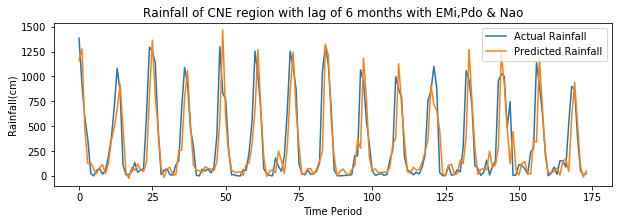

Co-efficient of corelation :
0.8346220917877215
RMSE(mm) for CNE(with EMi,Pdo & Nao) :
229.56679281827567
NSE for CNE(with EMi,Pdo & Nao) :
0.6090858761841416


In [249]:
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(24,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Emi_test = pd.read_excel("Emi_test.xlsx")
temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 6 months with EMi,Pdo & Nao")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with EMi,Pdo & Nao) :")
print(RMSE)
print("NSE for CNE(with EMi,Pdo & Nao) :")
print(NSE(y_test,y_pred))

Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_31 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_124 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_125 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_126 (Dense)            (None, 32)              

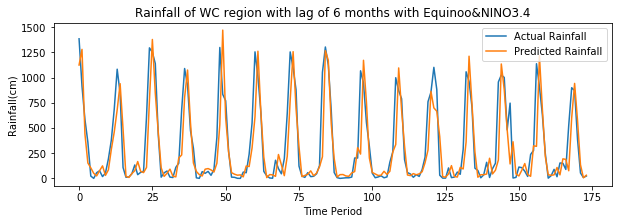

Co-efficient of corelation :
0.8266855728112361
RMSE(mm) for WC(with Equinoo&NINO3.4) :
235.97114583030927
NSE for WC(with Equinoo&NINO3.4) :
0.5761891280797067


In [251]:
#with all Indices
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with Equinoo&NINO3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with Equinoo&NINO3.4) :")
print(RMSE)
print("NSE for WC(with Equinoo&NINO3.4) :")
print(NSE(y_test,y_pred))

Model: "functional_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 36, 1)]           0         
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 36, 64)            192       
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 36, 128)           16512     
_________________________________________________________________
flatten_32 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_128 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_129 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_130 (Dense)            (None, 32)              

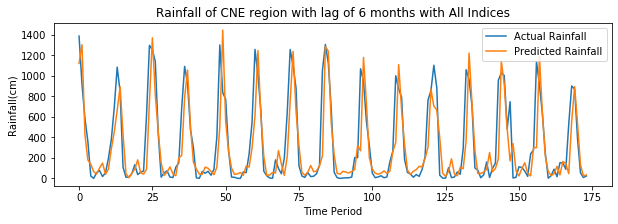

Co-efficient of corelation :
0.820312188014059
RMSE(mm) for CNE(with All Indices) :
237.9497026910622
NSE for CNE(with All Indeices) :
0.5463124437087272


In [252]:
#with all Indices
temp = CNE_train.groupby("YEAR").sum()
CNE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = CNE_train_data_arr.reshape(CNE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(36,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = CNE_test.groupby("YEAR").sum()
CNE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = CNE_test_data_arr.reshape(CNE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of CNE region with lag of 6 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for CNE(with All Indices) :")
print(RMSE)
print("NSE for CNE(with All Indeices) :")
print(NSE(y_test,y_pred))

Model: "functional_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_33 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 128)               98432     
_________________________________________________________________
dense_133 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_134 (Dense)            (None, 32)              

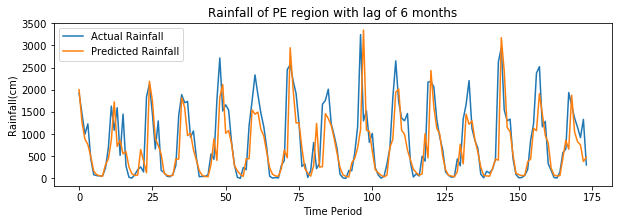

Co-efficient of corelation :
0.7502162704370182
RMSE(mm) for PE :
551.0357489494988
NSE for PE:
0.3150886812243767


In [253]:
PE1 = train_data[(train_data.SUBDIVISION == 'COASTAL ANDHRA PRADESH')]
PE2 = train_data[(train_data.SUBDIVISION == 'RAYALSEEMA')]
PE3 = train_data[(train_data.SUBDIVISION == 'TAMIL NADU')]
PE4 = train_data[(train_data.SUBDIVISION == 'COASTAL KARNATAKA')]
PE5 = train_data[(train_data.SUBDIVISION == 'SOUTH INTERIOR KARNATAKA')]
PE6 = train_data[(train_data.SUBDIVISION == 'KERALA')]
PE_train = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

PE1 = test_data[(test_data.SUBDIVISION == 'COASTAL ANDHRA PRADESH')]
PE2 = test_data[(test_data.SUBDIVISION == 'RAYALSEEMA')]
PE3 = test_data[(test_data.SUBDIVISION == 'TAMIL NADU')]
PE4 = test_data[(test_data.SUBDIVISION == 'COASTAL KARNATAKA')]
PE5 = test_data[(test_data.SUBDIVISION == 'SOUTH INTERIOR KARNATAKA')]
PE6 = test_data[(test_data.SUBDIVISION == 'KERALA')]
PE_test = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 6 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE :")
print(RMSE)
print("NSE for PE:")
print(NSE(y_test,y_pred))

Model: "functional_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 24, 1)]           0         
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 24, 64)            192       
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 24, 128)           16512     
_________________________________________________________________
flatten_34 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_136 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_137 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_138 (Dense)            (None, 32)              

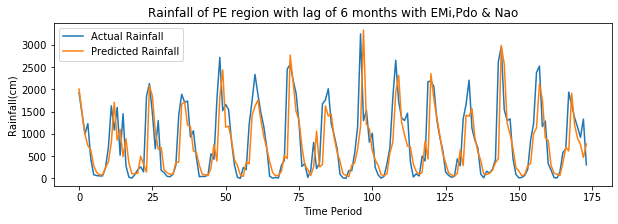

Co-efficient of corelation :
0.7406598990101351
RMSE(mm) for PE(with EMi,Pdo & Nao) :
552.5116156706486
NSE for PE(with EMi,Pdo & Nao) :
0.33876653371237264


In [254]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(24,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Emi_test = pd.read_excel("Emi_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 6 months with EMi,Pdo & Nao")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with EMi,Pdo & Nao) :")
print(RMSE)
print("NSE for PE(with EMi,Pdo & Nao) :")
print(NSE(y_test,y_pred))

Model: "functional_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_35 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_140 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_141 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_142 (Dense)            (None, 32)              

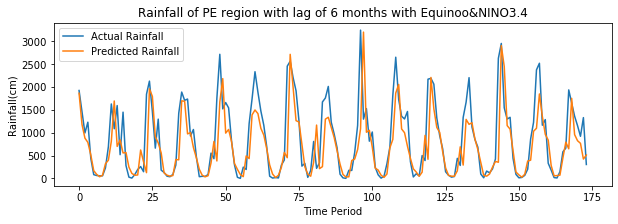

Co-efficient of corelation :
0.7462916780595111
RMSE(mm) for PE(with Equinoo&NINO3.4) :
555.5873229421879
NSE for PE(with Equinoo&NINO3.4) :
0.22830513115419948


In [255]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 6 months with Equinoo&NINO3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with Equinoo&NINO3.4) :")
print(RMSE)
print("NSE for PE(with Equinoo&NINO3.4) :")
print(NSE(y_test,y_pred))

Model: "functional_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 36, 1)]           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 36, 64)            192       
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 36, 128)           16512     
_________________________________________________________________
flatten_36 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_145 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_146 (Dense)            (None, 32)              

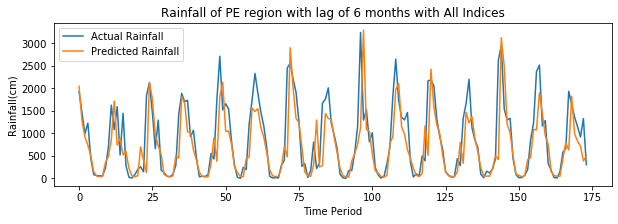

Co-efficient of corelation :
0.752700066147491
RMSE(mm) for PE(with All Indices) :
549.2887327121256
NSE for PE(with All Indeices) :
0.3356738731348414


In [256]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(36,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of PE region with lag of 6 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for PE(with All Indices) :")
print(RMSE)
print("NSE for PE(with All Indeices) :")
print(NSE(y_test,y_pred))

Model: "functional_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_37 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 128)               98432     
_________________________________________________________________
dense_149 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_150 (Dense)            (None, 32)              

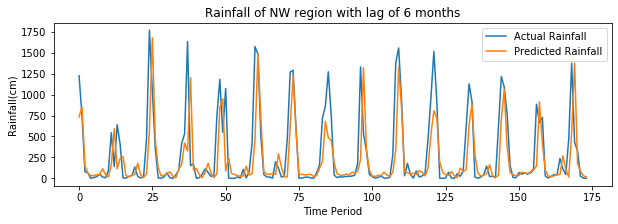

Co-efficient of corelation :
0.6876303414569973
RMSE(mm) for NW :
329.35481383891204
NSE for NW:
0.011677739365603457


In [257]:
PE1 = train_data[(train_data.SUBDIVISION == 'HARYANA DELHI & CHANDIGARH')]
PE2 = train_data[(train_data.SUBDIVISION == 'PUNJAB')]
PE3 = train_data[(train_data.SUBDIVISION == 'WEST RAJASTHAN')]
PE4 = train_data[(train_data.SUBDIVISION == 'EAST RAJASTHAN')]
PE5 = train_data[(train_data.SUBDIVISION == 'GUJARAT REGION')]
PE6 = train_data[(train_data.SUBDIVISION == 'SAURASHTRA & KUTCH')]
PE_train = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

PE1 = test_data[(test_data.SUBDIVISION == 'HARYANA DELHI & CHANDIGARH')]
PE2 = test_data[(test_data.SUBDIVISION == 'PUNJAB')]
PE3 = test_data[(test_data.SUBDIVISION == 'WEST RAJASTHAN')]
PE4 = test_data[(test_data.SUBDIVISION == 'EAST RAJASTHAN')]
PE5 = test_data[(test_data.SUBDIVISION == 'GUJARAT REGION')]
PE6 = test_data[(test_data.SUBDIVISION == 'SAURASHTRA & KUTCH')]
PE_test = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6])
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 6 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW :")
print(RMSE)
print("NSE for NW:")
print(NSE(y_test,y_pred))

Model: "functional_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 24, 1)]           0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 24, 64)            192       
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 24, 128)           16512     
_________________________________________________________________
flatten_38 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_152 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_153 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_154 (Dense)            (None, 32)              

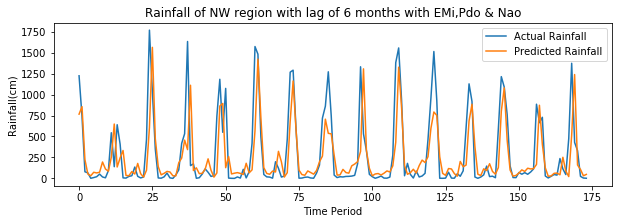

Co-efficient of corelation :
0.7122302552111248
RMSE(mm) for NW(with EMi,Pdo & Nao) :
312.67043509531425
NSE for NW(with EMi,Pdo & Nao) :
0.025748276318929064


In [258]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(24,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Emi_test = pd.read_excel("Emi_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 6 months with EMi,Pdo & Nao")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with EMi,Pdo & Nao) :")
print(RMSE)
print("NSE for NW(with EMi,Pdo & Nao) :")
print(NSE(y_test,y_pred))

Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_39 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_156 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_157 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_158 (Dense)            (None, 32)              

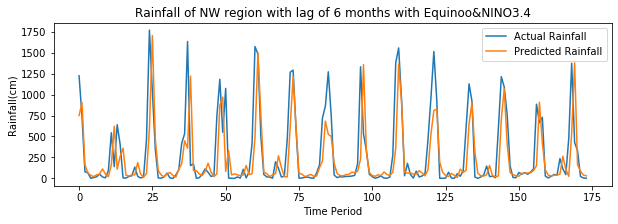

Co-efficient of corelation :
0.6888843207251338
RMSE(mm) for NW(with Equinoo&NINO3.4) :
328.36853625778394
NSE for NW(with Equinoo&NINO3.4) :
0.0614590466116377


In [259]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 6 months with Equinoo&NINO3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with Equinoo&NINO3.4) :")
print(RMSE)
print("NSE for NW(with Equinoo&NINO3.4) :")
print(NSE(y_test,y_pred))

Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 36, 1)]           0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 36, 64)            192       
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 36, 128)           16512     
_________________________________________________________________
flatten_40 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_160 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_161 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_162 (Dense)            (None, 32)              

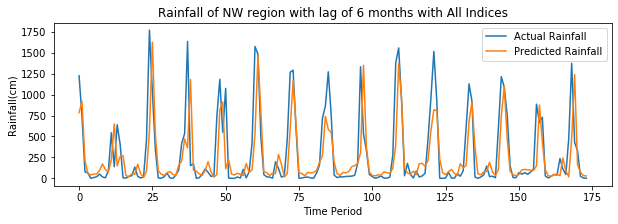

Co-efficient of corelation :
0.7038334770794998
RMSE(mm) for NW(with All Indices) :
317.5722169001034
NSE for NW(with All Indeices) :
0.06455298102015783


In [260]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(36,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of NW region with lag of 6 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for NW(with All Indices) :")
print(RMSE)
print("NSE for NW(with All Indeices) :")
print(NSE(y_test,y_pred))

Model: "functional_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_82 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_41 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 128)               98432     
_________________________________________________________________
dense_165 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_166 (Dense)            (None, 32)              

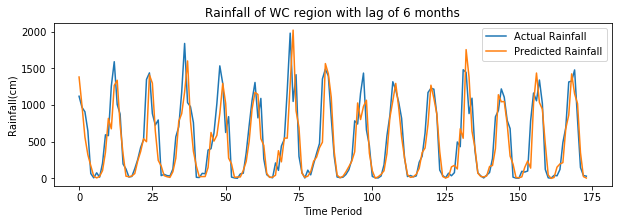

Co-efficient of corelation :
0.852460616443796
RMSE(mm) for WC :
275.2790631556439
NSE for WC:
0.6578679752572056


In [261]:
PE1 = train_data[(train_data.SUBDIVISION == 'ASSAM & MEGHALAYA')]
PE2 = train_data[(train_data.SUBDIVISION == 'SUB HIMALAYAN WEST BENGAL & SIKKIM')]
PE3 = train_data[(train_data.SUBDIVISION == 'GANGETIC WEST BENGAL')]
PE_train = pd.concat([PE1,PE2,PE3])
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

PE1 = test_data[(test_data.SUBDIVISION == 'ASSAM & MEGHALAYA')]
PE2 = test_data[(test_data.SUBDIVISION == 'SUB HIMALAYAN WEST BENGAL & SIKKIM')]
PE3 = test_data[(test_data.SUBDIVISION == 'GANGETIC WEST BENGAL')]
PE_test = pd.concat([PE1,PE2,PE3])
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC :")
print(RMSE)
print("NSE for WC:")
print(NSE(y_test,y_pred))

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 24, 1)]           0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 24, 64)            192       
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 24, 128)           16512     
_________________________________________________________________
flatten_42 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_168 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_169 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_170 (Dense)            (None, 32)              

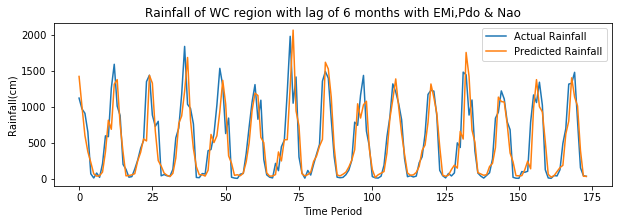

Co-efficient of corelation :
0.8509026080719703
RMSE(mm) for WC(with EMi,Pdo & Nao) :
273.9758152449591
NSE for WC(with EMi,Pdo & Nao) :
0.6662245764056285


In [262]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(24,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Emi_test = pd.read_excel("Emi_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with EMi,Pdo & Nao")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with EMi,Pdo & Nao) :")
print(RMSE)
print("NSE for WC(with EMi,Pdo & Nao) :")
print(NSE(y_test,y_pred))

Model: "functional_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_43 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_172 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_173 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_174 (Dense)            (None, 32)              

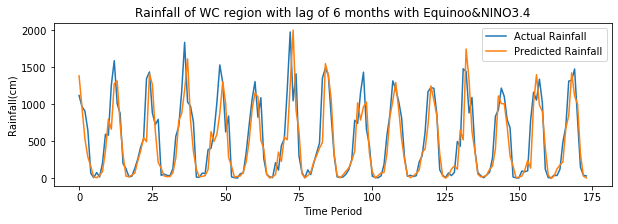

Co-efficient of corelation :
0.8546703774049369
RMSE(mm) for WC(with Equinoo&NINO3.4) :
275.6781061523656
NSE for WC(with Equinoo&NINO3.4) :
0.6508611855789213


In [263]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with Equinoo&NINO3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with Equinoo&NINO3.4) :")
print(RMSE)
print("NSE for WC(with Equinoo&NINO3.4) :")
print(NSE(y_test,y_pred))

Model: "functional_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 36, 1)]           0         
_________________________________________________________________
conv1d_88 (Conv1D)           (None, 36, 64)            192       
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 36, 128)           16512     
_________________________________________________________________
flatten_44 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_176 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_177 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_178 (Dense)            (None, 32)              

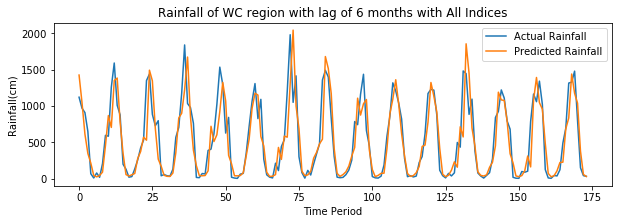

Co-efficient of corelation :
0.854316427078763
RMSE(mm) for WC(with All Indices) :
270.7290458269041
NSE for WC(with All Indeices) :
0.6851365881516722


In [264]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(36,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with All Indices) :")
print(RMSE)
print("NSE for WC(with All Indeices) :")
print(NSE(y_test,y_pred))

Model: "functional_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_90 (Conv1D)           (None, 6, 64)             192       
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 6, 128)            16512     
_________________________________________________________________
flatten_45 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_180 (Dense)            (None, 128)               98432     
_________________________________________________________________
dense_181 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_182 (Dense)            (None, 32)              

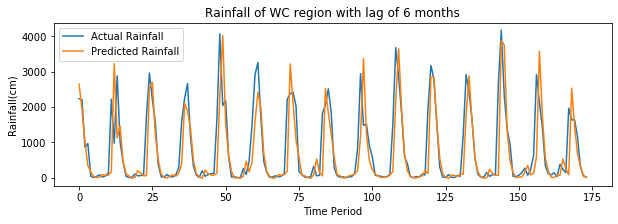

Co-efficient of corelation :
0.7761542334065928
RMSE(mm) for WC :
695.8999874651885
NSE for WC:
0.5072330711493365


In [265]:
PE1 = train_data[(train_data.SUBDIVISION == 'WEST MADHYA PRADESH')]
PE2 = train_data[(train_data.SUBDIVISION == 'EAST MADHYA PRADESH')]
PE3 = train_data[(train_data.SUBDIVISION == 'KONKAN & GOA')]
PE4 = train_data[(train_data.SUBDIVISION == 'MADHYA MAHARASHTRA')]
PE5 = train_data[(train_data.SUBDIVISION == 'MATATHWADA')]
PE6 = train_data[(train_data.SUBDIVISION == 'VIDARBHA')]
PE7 = train_data[(train_data.SUBDIVISION == 'TELANGANA')]
PE8 = train_data[(train_data.SUBDIVISION == 'NORTH INTERIOR KARNATAKA')]
PE_train = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8])
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

PE1 = test_data[(test_data.SUBDIVISION == 'WEST MADHYA PRADESH')]
PE2 = test_data[(test_data.SUBDIVISION == 'EAST MADHYA PRADESH')]
PE3 = test_data[(test_data.SUBDIVISION == 'KONKAN & GOA')]
PE4 = test_data[(test_data.SUBDIVISION == 'MADHYA MAHARASHTRA')]
PE5 = test_data[(test_data.SUBDIVISION == 'MATATHWADA')]
PE6 = test_data[(test_data.SUBDIVISION == 'VIDARBHA')]
PE7 = test_data[(test_data.SUBDIVISION == 'TELANGANA')]
PE8 = test_data[(test_data.SUBDIVISION == 'NORTH INTERIOR KARNATAKA')]
PE_test = pd.concat([PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8])
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC :")
print(RMSE)
print("NSE for WC:")
print(NSE(y_test,y_pred))

Model: "functional_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 24, 1)]           0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 24, 64)            192       
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 24, 128)           16512     
_________________________________________________________________
flatten_46 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_184 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_185 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_186 (Dense)            (None, 32)              

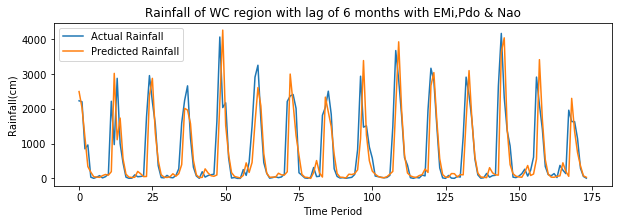

Co-efficient of corelation :
0.7675784904927919
RMSE(mm) for WC(with EMi,Pdo & Nao) :
703.6723517829938
NSE for WC(with EMi,Pdo & Nao) :
0.4956096130425549


In [266]:
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_train_arr = np.asarray(Emi_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
Emi_train_array = Emi_train_arr.reshape(Emi_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(24,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Emi_test = pd.read_excel("Emi_test.xlsx")
temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
Emi_test_arr = np.asarray(Emi_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
Emi_test_array = Emi_test_arr.reshape(Emi_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = Emi_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = pdo_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with EMi,Pdo & Nao")
plt.legend()
plt.show()



import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with EMi,Pdo & Nao) :")
print(RMSE)
print("NSE for WC(with EMi,Pdo & Nao) :")
print(NSE(y_test,y_pred))

Model: "functional_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
conv1d_94 (Conv1D)           (None, 18, 64)            192       
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 18, 128)           16512     
_________________________________________________________________
flatten_47 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_188 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_189 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_190 (Dense)            (None, 32)              

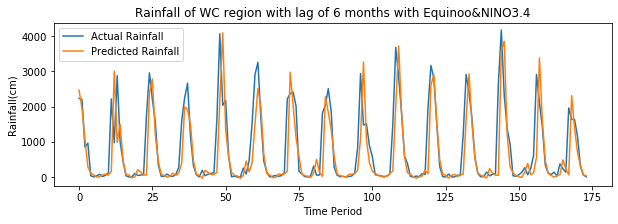

Co-efficient of corelation :
0.7694586220179588
RMSE(mm) for WC(with Equinoo&NINO3.4) :
703.4749037748255
NSE for WC(with Equinoo&NINO3.4) :
0.46767398585047937


In [267]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(18,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with Equinoo&NINO3.4")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with Equinoo&NINO3.4) :")
print(RMSE)
print("NSE for WC(with Equinoo&NINO3.4) :")
print(NSE(y_test,y_pred))

Model: "functional_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 36, 1)]           0         
_________________________________________________________________
conv1d_96 (Conv1D)           (None, 36, 64)            192       
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 36, 128)           16512     
_________________________________________________________________
flatten_48 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_192 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_193 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_194 (Dense)            (None, 32)              

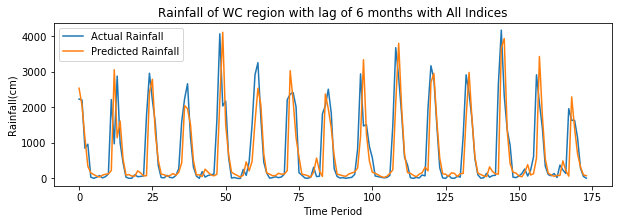

Co-efficient of corelation :
0.7713578299312269
RMSE(mm) for WC(with All Indices) :
690.820867945771
NSE for WC(with All Indeices) :
0.4937175053405235


In [268]:
#with all Indices
temp = PE_train.groupby("YEAR").sum()
PE_train_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_train_arr = np.asarray(Equino_train[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

train_array = PE_train_data_arr.reshape(PE_train_data_arr.shape[0]*12,1)
equino_train_array = equino_train_arr.reshape(equino_train_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train,X_train2),axis=1)
        X_train = np.concatenate((X_train,X_train3),axis=1)
        X_train = np.concatenate((X_train,X_train4),axis=1)
        X_train = np.concatenate((X_train,X_train5),axis=1)
        y_train = train_array[i+6]
    else :
        temp1 = train_array[i:i+6].reshape(1,6)
        X_train1 = equino_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train1),axis=1)
        X_train2 = nino_train_array[i:i+6].reshape(1,6)
        X_train3 = nao_train_array[i:i+6].reshape(1,6)
        X_train4 = Pdo_train_array[i:i+6].reshape(1,6)
        X_train5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_train2),axis=1)
        temp1 = np.concatenate((temp1,X_train3),axis=1)
        temp1 = np.concatenate((temp1,X_train4),axis=1)
        temp1 = np.concatenate((temp1,X_train5),axis=1)
        X_train = np.concatenate((X_train, temp1), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(36,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

temp = PE_test.groupby("YEAR").sum()
PE_test_data_arr = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])
equino_test_arr = np.asarray(Equino_test[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']])

test_array = PE_test_data_arr.reshape(PE_test_data_arr.shape[0]*12,1)
equino_test_array = equino_test_arr.reshape(equino_test_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test1),axis=1)
        X_test2 =  nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test,X_test2),axis=1)
        X_test = np.concatenate((X_test,X_test3),axis=1)
        X_test = np.concatenate((X_test,X_test4),axis=1)
        X_test = np.concatenate((X_test,X_test5),axis=1)
        y_test = test_array[i+6]
    else :
        temp1 = test_array[i:i+6].reshape(1,6)
        X_test1 = equino_test_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test1),axis=1)
        X_test2 = nino_test_array[i:i+6].reshape(1,6)
        X_test3 = nao_test_array[i:i+6].reshape(1,6)
        X_test4 = pdo_test_array[i:i+6].reshape(1,6)
        X_test5 = Emi_train_array[i:i+6].reshape(1,6)
        temp1 = np.concatenate((temp1,X_test2),axis=1)
        temp1 = np.concatenate((temp1,X_test3),axis=1)
        temp1 = np.concatenate((temp1,X_test4),axis=1)
        temp1 = np.concatenate((temp1,X_test5),axis=1)
        X_test = np.concatenate((X_test, temp1), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10,3))
plt.plot(y_test,label="Actual Rainfall")
plt.plot(y_pred,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of WC region with lag of 6 months with All Indices")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

y_pred = y_pred.reshape(174,)
r = np.corrcoef(y_test,y_pred)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for WC(with All Indices) :")
print(RMSE)
print("NSE for WC(with All Indeices) :")
print(NSE(y_test,y_pred))